# SHAP Interpretation Report: LSTM
This notebook provides a post-hoc explanation of the model's predictions using gradient SHAP.

**Model Architecture:** LSTM
**Analysis Context:** timeseries
**Dataset Scope:** whole


In [1]:
import shap
import numpy as np
import matplotlib.pyplot as plt

# Data provided by the explainer
all_shap_dict = {0: [[[[6.630178551296431e-05], [0.00014316174861913488], [-9.929175982154152e-06], [0.0002005313215136844], [2.2593536812185143e-05], [5.4043717715732255e-05], [0.005508931748453503], [-0.00034839705486306127], [-0.00017985175055064819], [-0.0001347752051042718], [-0.0008731719953351079], [0.006938687336759566]], [[-0.0007944291756800937], [-0.0014414235093115474], [0.00013658218323538945], [0.0008835579010016968], [7.873562759284163e-05], [-0.0005728335186958208], [0.010114122344574795], [0.000370218590463468], [0.0013052788914453867], [-0.00017335967101274333], [-0.0012781543930202252], [0.012560216721824976]], [[0.0011698345335522935], [-0.0013334072354275345], [-0.0009960426071980904], [-0.0004411794030214366], [-0.00024133119355762531], [0.0003242582605169408], [0.025326251648424523], [0.0014445248502383662], [-0.0021875905271339295], [0.0004778298877483275], [0.005429754896498461], [0.007137025185236833]], [[0.0149059832756744], [0.04733449416613033], [0.014014481166240282], [-0.010689897276495514], [-0.000848781321488301], [0.005267289280498577], [0.025174342598292102], [-0.0015994228502553742], [-0.00023926552206780978], [-0.001776140057409466], [-0.016980235726567906], [0.025515128903079075]], [[0.0010588370705903957], [-0.09147677744282338], [-0.010177296364682524], [8.32794891554714e-05], [0.0009615225015941286], [0.03824765176392083], [0.04074737966124795], [-0.00891669254428209], [-0.0034805617250836217], [-0.008399509110373862], [0.01062376529684259], [0.017796942172091778]], [[0.1723076350462877], [0.2101378316604567], [0.018043637926387916], [-0.011883923985742421], [-0.025627291773344895], [0.033048809293739795], [0.07169127891387392], [0.03942844234194927], [-0.02707224690981261], [0.008616203004729928], [0.01826188682637814], [0.030093256462408426]]], [[[0.0010013290536218097], [0.002423835685723745], [0.00026461681273707617], [0.0012330587575351808], [-8.234988938453414e-05], [0.0005597823981115849], [0.0019371624229593601], [-0.00023312691154233532], [-5.0421680439748285e-05], [-0.0003156919747273025], [-0.004050217703120962], [0.010941451616734854]], [[-0.009963003326986759], [-0.011043868016976018], [0.0023958204546376603], [0.003929075120320253], [0.0011341817023043097], [-0.003386173372042645], [-0.013032616089776614], [0.00021652263982429253], [0.006736814503108875], [-0.0020634985404129704], [-0.006986071808456003], [0.02806571861977337]], [[0.02041353875725596], [-0.008840842217040542], [-0.01008378673461831], [0.006375279335754196], [-0.002927966099460474], [0.017952780016025224], [0.03792020804267743], [-0.00015241260822192044], [-0.0006837912900179893], [-0.002942201838641683], [-0.004969761494526496], [-0.031631139676370094]], [[0.0737252348178771], [0.19536726436269905], [0.0346749038782602], [-0.03537895845878955], [-0.01300492781122654], [0.004654825028410739], [0.03283573479229755], [0.013711737766406351], [-0.005717851668754621], [0.011068142383129718], [-0.02444253001461234], [0.04639541185070209]], [[-0.12790797290689723], [-0.2960105388098519], [-0.011479838887466159], [0.032983423075374135], [0.02557897927782942], [0.0002590367596312707], [0.008741170811041159], [-0.030182913025033235], [0.03213877715467723], [-0.020559092599238982], [0.003663999301267028], [0.08429318006072156]], [[0.42063401091078917], [0.4004854612413574], [0.049325912672280696], [-0.06426285935098862], [-0.052009981569663674], [0.028654823365391005], [0.06245518062202224], [0.04249042066858627], [-0.045542777925536945], [0.009530935801471995], [0.0061860404486894435], [-0.07550251952928658]]], [[[0.0017918970267520775], [0.004135447914901048], [0.002314234049347774], [0.005249294415913741], [-0.0003293304439916492], [0.0009316867931542463], [0.006527031282398395], [-0.0009649290016442151], [0.0016846788843823263], [-0.0026722052138608587], [-0.013613721762221481], [0.013540675670087461]], [[-0.026009458193516095], [-0.06289458609409865], [-0.001753358430949597], [0.0009320986945034935], [0.0017772919233649692], [-0.01298135094598861], [-0.013053508507479114], [-0.0023807172038137685], [0.005977208109930011], [-0.0019443710185014674], [-0.002301302485862768], [0.016000609298919066]], [[0.08121605637421897], [0.09115110817899552], [-0.0019773811110132115], [-0.0125012981220328], [-0.014432517231520883], [0.04978984324181909], [0.05908258749648328], [0.008544673525443126], [-0.014764923380925402], [0.00010430636611914542], [0.001537082719259305], [-0.0012402860842459197]], [[-0.02017429294006269], [0.038966323992169725], [0.033110933557194445], [-0.009727652022009892], [-0.010493761207037182], [-0.0005871618848931668], [0.005479368436075457], [0.015359157858740426], [0.009702450253222519], [0.0009574500041977228], [-0.01402695471685899], [0.10519613837689988]], [[-0.09100493228474531], [-0.2134319584323535], [0.003311487809206184], [0.0026456650070017743], [0.010628277652493683], [0.0013477622086765348], [0.03546948912182855], [-0.05012732099389756], [0.034319343937920826], [-0.025351871354380204], [-0.03875182031358109], [0.057500624296937426]], [[0.49077760700439926], [0.6775832361193799], [0.07895622170830037], [-0.0670334102718772], [-0.05964853914567526], [0.054750370739610386], [0.03083701355342795], [0.06353902628830435], [-0.0501235071209196], [0.009708978582379728], [0.0013331342762755768], [-0.07754064582201561]]], [[[-0.004139180065391295], [-0.0008954940410899981], [0.0036765961183310727], [0.0029068999270499564], [0.00050498033671525], [-0.0034396113499335634], [6.038724209386087e-06], [-0.0005094869794397628], [0.0023301473855639097], [-0.0007356227963201603], [-0.006114409882396133], [0.009385584063984955]], [[-0.006927708351693232], [-0.0403921520273589], [-0.004188856736666771], [0.0070571365911399255], [0.0019950942631233024], [0.00252169253023648], [0.0143055295445112], [-0.003988804542818784], [0.0021455800888161734], [-0.0025554424056811074], [-0.001538946484976379], [-0.0048000312343567915]], [[0.04997756552948839], [0.08172659104889941], [0.009962208936291078], [-0.012746365482411174], [-0.011667978082579382], [0.008857054890309081], [0.019746400752313823], [0.009593643242235928], [-0.015244060548247326], [0.005192082637847285], [0.007505545807891209], [0.008281314790917425]], [[-0.07199959819909191], [-0.0850132912161727], [0.015121750384669704], [0.01414969056123775], [0.009181881004117242], [-0.0011570725944728332], [0.007940891596424695], [0.007050169645665065], [0.017312794685016432], [-0.004765192190881365], [-0.007000496675636565], [0.08057218196987863]], [[0.08315153692157569], [0.05073363833567385], [0.015816022365005077], [-0.039292807602038925], [-0.021578570354886254], [0.014246493349594578], [0.0187793435649148], [-0.03621435127488835], [0.0002513079506388903], [-0.010391205815466707], [-0.02800858074352179], [-0.028885941541319616]], [[0.24885196500927087], [0.32579421468713954], [0.030891128587745616], [-0.005947919413137746], [-0.03011605118358873], [0.004698365313328303], [-0.03304629426009901], [0.051535962910266214], [-0.031051445310797954], [0.010965328441044935], [0.02138231815169002], [0.03722259484867611]]], [[[0.029017204333824247], [0.0533981935949339], [0.0055186093288075114], [-0.005355840192546881], [-0.004515647452813527], [0.008037552634345165], [0.01256325070795115], [0.00609970561302785], [-0.005342750656492504], [0.002442151614981993], [-0.0014282744884057856], [0.001445129348128704]], [[-0.03743203561852487], [-0.050387570001818906], [0.0096279493256317], [0.005673041810109794], [0.0041389259765693244], [-0.0036805977519078466], [0.00021645173919346782], [-0.0018717711942705733], [0.010477314569478037], [-0.0030335561914622], [-0.00342672289389915], [0.032256388752770156]], [[0.05248081935959181], [0.028373009876040224], [0.010754188861194891], [-0.002357130949969066], [-0.009342899750615731], [0.005122032534332704], [0.007715755679856155], [-0.010109268532585737], [-0.003045514964273156], [-0.004603058198939746], [-0.013086514160473052], [-0.01615636752305116]], [[0.0455503510127414], [0.08406488189593381], [0.024163899493165376], [-0.02028605881190092], [-0.003405420001165485], [0.009712223101167134], [0.009116762832798398], [0.019509015337840146], [-0.01489350664209299], [0.003335201403430624], [0.014692390693858819], [0.042383050605422044]], [[-0.08662952272478756], [-0.2935077484201844], [-0.02503229475989635], [0.023142848420055186], [0.016207241691449444], [0.0003464466375578114], [-0.001693129179596187], [-0.016203736612392397], [0.015142801136264362], [-0.012000524267883294], [0.003640633381878504], [0.09995198966152538]], [[0.3897338088562059], [0.3649198843862999], [0.053333973845830614], [-0.0003705939875051309], [-0.048013451866206494], [0.008107300989512504], [-0.11527534383186851], [0.05912916945636933], [-0.03728407570107981], [0.006071694788714039], [0.015313176710853187], [0.01824501877457946]]], [[[-0.003551776675507525], [-0.0017728370037087377], [0.005010336709499793], [0.004014377312618616], [0.00010294337339258479], [-0.0004677759226283741], [0.002857276777578069], [0.0010658306615752857], [0.0010099088961171895], [-0.00045958229892717944], [-0.0016810784273928615], [0.009531620374599752]], [[-0.005127904664713273], [-0.016566006244913892], [0.0012316383406943895], [0.001916189439030288], [-0.0004115664859505661], [0.00011823520558782066], [0.006779458710206796], [-0.002004491291184234], [0.0011609335007244739], [-0.0015745734385395386], [-0.0018050502436074234], [0.008977215220671355]], [[0.0428958030102601], [0.0551921488080424], [0.012230252991005948], [-0.0016391717742890183], [-0.00580313216489394], [0.0070726884194456064], [-0.0010713025678225092], [0.011069265594390542], [-0.007804799070446915], [0.0011958150712601677], [0.004383123125255367], [0.010619063259725961]], [[-0.031083004456411344], [-0.0791063804575574], [0.006966124402800457], [0.024239508965951062], [0.006819982153842224], [0.0003860953745731476], [0.0025386823054068873], [0.005503070428910962], [0.005013283531852886], [-0.0025522774689495844], [-0.000717818373861534], [0.060185140823356756]], [[0.04534018697916793], [-0.0017649483792346419], [-0.009972338646107139], [-0.0037003954168617903], [-0.014839367603646101], [-0.0007670133004058891], [-0.06575062072292764], [0.01866946790502016], [-0.005818585070696966], [0.0010411706430285023], [0.0059123450592090355], [0.06623894530667437]], [[0.07712929104371202], [0.15286031497352603], [0.0641180494139416], [0.029358921645078008], [-0.021004175918524468], [0.021805330389273195], [-0.12364847214470032], [0.027297598396478703], [-0.01298163568965426], [0.005108430914592641], [0.012070392817366446], [0.03999835811918813]]], [[[-0.0034346514489884115], [-0.005161571245795165], [0.0010026291583786716], [0.003946933729404875], [0.0002805199258611357], [8.839528280108189e-05], [0.0016578147731108415], [0.0009608418763621345], [0.0013988258426337512], [-0.0006686542158510325], [-0.000747861697102355], [0.007692814006060889]], [[0.0005875151200366931], [-0.003693302630817525], [0.0014943604630276405], [-0.0014843794904958734], [-0.002343223046954433], [0.0012406841369119713], [0.0020182051245943304], [-8.332140714670758e-05], [-0.0003209378629873087], [-0.000686777550699535], [-0.000668538119161271], [0.012168367453952363]], [[0.011535969224646383], [-0.003727390925947355], [0.000609592249164099], [0.004490516292666721], [-0.0019133004242579297], [0.001791986710496563], [-0.006728792077914183], [0.005312948009910251], [-0.0024625925935629553], [-0.0003546014150792839], [0.0025680517159483354], [0.026355532957436686]], [[0.006766697460304607], [-0.006037134110216836], [0.012813562503921074], [0.00712112969076914], [-0.00468844420547308], [0.001093035325436772], [-0.02353361049446206], [0.00796194619286304], [-0.00038643895514262164], [-0.0011741827529576053], [-0.0015952172751975688], [0.05926962803827077]], [[-0.0034366597802462737], [-0.03991406137493008], [-0.014747682530420416], [0.00529699886290446], [-0.007584036980223489], [-0.00704875629940767], [-0.09672294729813755], [0.01948888339616951], [-0.0010299083137978405], [0.0014703941981109503], [0.010323994085229432], [0.08956996284354687]], [[0.08759065086291339], [0.1273474887171559], [0.03317744665493922], [0.011418679262515824], [-0.02270076706239459], [0.024555533905260475], [-0.1745139933953283], [0.016426135504912672], [-0.0069650250297315815], [0.0031831334390433844], [7.440041158394063e-05], [0.028126072987620397]]], [[[0.0010438968445069191], [0.0007429348374120705], [0.0006867461397180621], [0.0008568922431139564], [-0.0006540208606745647], [0.000618197102917035], [0.0006747342596445279], [0.002047748833206271], [-0.0004865440117491394], [-0.0001303087910104128], [0.0006463971486108518], [0.006991809717006366]], [[-0.0032123837068005106], [-0.01361388196491366], [0.00023821966590829424], [0.005302349899363149], [-0.0003262241125295981], [0.00025237965277211257], [-0.003208135295957809], [0.0037796063286917652], [5.070428919109282e-05], [-0.00039124168673543573], [0.0011661580813205148], [0.015566626978669538]], [[0.009949494905551363], [0.0012668381401634635], [0.00527420815308222], [0.0028156894087871874], [-0.0031166454927731265], [0.0008938897328028207], [-0.01774252065421238], [0.005364333541864209], [-0.0016544863750490042], [-0.00017266370566518176], [0.0006115675430074634], [0.02720465748320912]], [[0.00010856005666409494], [-0.01233226807529729], [0.001738502688372146], [0.006454619667914967], [-0.0032317435043101306], [-0.001445737485035225], [-0.049614425071152476], [0.009690170696322048], [0.0005632682272107885], [-0.0006637416648946226], [0.0014886912526753488], [0.04723161937091494]], [[0.015144732496890096], [0.014618082031226888], [0.0015266569119130402], [0.0033424394425855563], [-0.006502210590224409], [0.0019199701288046564], [-0.0902896523478394], [0.012754689390759832], [-0.001624490393472469], [0.002375531659962138], [0.0024994176090253027], [0.039556774935460656]], [[0.03348315974899999], [0.034969710258667644], [0.014558284862981417], [0.004256051185779141], [-0.00482208132049409], [0.0007075827028434023], [-0.08385275793779906], [0.0012176729514536868], [-0.0010035198881128047], [0.0011713655595887345], [0.0032750714114194203], [0.021360171780933617]]], [[[-0.0004973539337875882], [-0.004147989480788488], [0.0005283012920042903], [0.003366911581018287], [0.00017810037434974412], [0.0001468621762280539], [-0.0008354700978549515], [0.0014666910798750747], [-0.00013843035517640173], [-8.087554517919976e-05], [0.000497389511218732], [0.006408180575195771]], [[-0.0017504938421133859], [-0.005424971262463715], [0.0014739683942422068], [0.003131008349446317], [-0.0002787807610732859], [-8.90083329292252e-05], [-0.007185009433368287], [0.003341691369101469], [4.22014839256327e-05], [-4.743243689559983e-06], [0.0006378055516134193], [0.012784867190503459]], [[0.001763700714931012], [-0.0013780552595950035], [0.0016389094426799155], [0.002570719062690961], [-0.002040834201216575], [6.452024335976948e-05], [-0.024127724363846054], [0.005096068683277093], [-0.00023464965865424412], [0.0001023371751510984], [0.0008668043219769066], [0.018646303621098318]], [[0.008666694073641151], [0.010433184999308627], [0.0044747542347027495], [0.002270897672737031], [-0.002783677826672622], [0.003073136192621752], [-0.03540438131300506], [0.004517426652635191], [-1.5866450304955308e-05], [-2.01614126468146e-05], [-0.0021357376555873817], [0.02010215165258602]], [[-0.0038487563988397837], [-0.007935774501322733], [-0.0019488062564035086], [0.0012373838379002207], [-0.0005236902275544187], [-0.0010848489676709104], [-0.040502757943662475], [0.001413686496114233], [0.0001205445913029359], [0.0012497516406148425], [0.0041959366966377995], [0.02536058559908705]], [[0.0021845546067094292], [-0.0011647840884706077], [0.0009713393512640908], [0.0009972937890928692], [-0.0031114854879909213], [0.0017079544996153662], [-0.07925988047432762], [-0.0065876427097069715], [-0.0012244776896691819], [0.0004347917361610576], [-0.0005471623649269728], [0.0049452085485457795]]], [[[-0.00015416470383478398], [-0.0016715925241066417], [0.0004256180608862737], [0.002009904275671863], [-0.00014412388759109425], [-6.160501141220216e-05], [-0.002702000575850736], [0.0013321402204074851], [-8.45687857549651e-05], [-5.4873575680554294e-05], [0.00018643131214508154], [0.005479294222413572]], [[-0.00044665130180612946], [-0.002209601745030272], [0.0009592404089817977], [0.0017879611212718823], [-0.0005115478228403286], [-0.0011741123569647043], [-0.010516138311921101], [0.0031005960871788108], [3.73545487702231e-05], [0.00014562901900305093], [0.0006042988468448049], [0.009133932474103084]], [[0.003003333502830717], [0.003041292113210553], [0.001370596234600588], [0.0010369198574929348], [-0.0012789207951932771], [0.00034902094923033644], [-0.020211798960955738], [0.0030537143741195018], [-0.00010761867912550092], [0.0002920667322821395], [-6.814145712661366e-06], [0.009894305300979121]], [[0.003407085820449929], [0.0031652779877291283], [0.0018629013206115385], [0.0008603492662387887], [-0.0009854297454038347], [0.0003721858969195993], [-0.021056396730842676], [0.0010448302077480096], [1.539378693248857e-05], [-0.00042200765542678274], [-0.0011999747689524635], [0.011662661234603302]], [[-0.0022420707929065946], [-0.002909335101520113], [-0.00018369108821093827], [0.0004384188596604221], [0.00033881838396794127], [-0.0027647640830475344], [-0.026773251626364295], [-0.0009936231166239918], [0.00011179677209271794], [0.0012707518320979113], [0.0032792022041703475], [0.01576704409812172]], [[-0.007598418872601348], [-0.006862450640970198], [-0.0005678254756142827], [-8.308506762211648e-05], [-0.0006552206723742283], [0.0064176760861783585], [-0.052789513680606255], [-0.005768436772821862], [-0.000907246025711978], [-6.732833225310763e-06], [-0.0008249912511301871], [0.001845767255592344]]], [[[-0.00018660153351109232], [-0.0011156606688569578], [0.00018158548105360006], [0.0012364214538199197], [-0.00016442866775291345], [-0.0007739489602210835], [-0.0037560311801358285], [0.001243051215890118], [1.418219091463444e-05], [-3.1810159278528886e-05], [9.116811367355473e-05], [0.004266807772476131]], [[0.0005597819657478429], [9.659813203343411e-05], [0.000726545559548956], [0.0007130539253816782], [-0.0004328342429741514], [-0.0005138020447382326], [-0.010507274008064046], [0.002230252016664393], [4.1826737206280785e-05], [0.00017988052569236767], [0.0002712220544361813], [0.005919955193732674]], [[0.0018246870672987176], [0.00160966582535051], [0.0009452154409595299], [0.0005018458896179221], [-0.000546613989333128], [9.866065089721855e-05], [-0.014196541554553578], [0.0014303822832245588], [2.260388872389827e-05], [-2.3752374029386716e-05], [-0.0004656133307441745], [0.006709338779081021]], [[0.000534350067432052], [0.00018006636174452357], [0.0001795758262165077], [0.000389768756203666], [-0.00046043268982811703], [0.0001454037387904963], [-0.016621730154208682], [-3.390768412864108e-05], [7.204128741179762e-05], [2.271267829285537e-05], [-0.00021384603281255862], [0.00964247863967344]], [[-0.0015301311796618827], [-0.0012952087032891664], [1.463470085093331e-05], [4.368321103093831e-05], [0.00020650522323614021], [-0.0022481337978445125], [-0.027101391994490555], [-0.003015846499238325], [-6.558565855168782e-05], [0.0006030921344974132], [0.0018801845228461104], [0.01149164978733721]], [[-0.007730671850593113], [-0.009115691688244373], [-0.0005090556796303092], [-0.0001942073562572285], [0.00033318445038118914], [0.0029671002581863216], [-0.04316601850572338], [-0.00678496571389919], [-0.0008451980812604527], [3.1462972516365446e-06], [-0.0007652382573548845], [0.0015467511985191287]]], [[[0.00016789116954945698], [-0.000116856584919003], [0.00017299670852213692], [0.00055490129353699], [-0.00026756129337776065], [-0.0006742642456154906], [-0.00401610381193199], [0.0008289148116985433], [-2.7840415777457325e-05], [-2.8349825479358092e-05], [-7.934953565104128e-05], [0.003531249125356771]], [[4.596871157216754e-05], [-0.00024435055092219155], [0.0004888030759309555], [0.00038937744118215775], [-0.0002031804849467618], [-0.0001886615329681252], [-0.009383128831198401], [0.0015217161411603033], [9.859523072069931e-05], [0.0001097920695745859], [0.0001351732951477693], [0.005559938507985735]], [[0.00033093172477945484], [6.468649823516611e-05], [6.88370335275488e-05], [0.0002549931299096285], [-0.00040134993383835805], [-0.00035617486230676084], [-0.015012188774872344], [0.0007665237355717793], [5.9719125263755364e-05], [0.00018609436062607434], [0.000303702958338936], [0.006671157983860083]], [[-0.0007664278240120923], [-0.0007591019725698612], [-2.2143654428245923e-05], [4.458173069042844e-05], [-0.0003969551555750991], [0.0010995440661129149], [-0.01869469498992204], [-0.0009906243873637447], [-0.00015263020904654698], [-0.0001702188297855152], [-0.0007608395266894072], [0.008201827617788175]], [[-0.00016695700864531756], [0.0006053754628686904], [0.00011820312182308175], [-8.87925767714691e-05], [0.0002587065253435848], [-0.0018796335070876146], [-0.01953375806113887], [-0.004888215524613212], [0.0004199384098968011], [0.0008333000653892908], [0.0022080695474094134], [0.011402309290537913]], [[-0.007453179129724655], [-0.00899513305453369], [-0.0006605420223240191], [-0.00016919394995381309], [0.0005899756175362089], [-0.001450953633408953], [-0.037528839481900285], [-0.007601602926027881], [-0.0007334059947659064], [-0.000110608009746371], [-0.0007616476295218258], [-0.0004410773568435996]]], [[[-6.201064987031342e-05], [-0.0002506403300004763], [7.536408955624125e-05], [0.00027742887382743573], [-0.00010153866344075981], [-0.0001263163995816101], [-0.0037574628299746633], [0.0005624949799953093], [-2.755916395557131e-05], [1.212182225556801e-05], [1.5043285835789596e-05], [0.002968358664522505]], [[8.056792938433092e-05], [-0.00011325642182713437], [6.939596369583922e-05], [0.00020520307566494723], [-0.0002262744442343671], [-0.0003159112667999466], [-0.009575778755536285], [0.000713019109419277], [2.8955641395774908e-05], [9.86083109904657e-05], [7.799501000301025e-05], [0.004599188858640408]], [[6.692160716020345e-05], [0.00016956691716099947], [1.5575710114620324e-05], [2.424134089570939e-05], [-0.00019414104280045613], [-0.00014145216784030163], [-0.012954555474595324], [-6.312554932967038e-05], [2.41001157451645e-05], [5.1555235036470514e-05], [-1.769349034490156e-05], [0.005996469438382542]], [[-0.0009144652862150044], [-0.0007487990555293328], [-7.431292293904216e-05], [-6.552674465932405e-05], [2.959010307018499e-05], [0.00015758355140346413], [-0.01582266121830691], [-0.0015785877894257372], [-2.082626749011003e-05], [-2.1331847397545308e-05], [-0.0003599039550523096], [0.007890261337616588]], [[-0.000531689834716731], [0.0002476447519807132], [0.00020680945912447582], [-4.250377256632621e-05], [0.00017105515816076477], [0.00013001777899559477], [-0.018827921593693092], [-0.006007206379637564], [9.495983558627553e-05], [0.0004798213264167065], [0.0014344927584264077], [0.009703243478326021]], [[-0.006391069428413652], [-0.007255171005334013], [-0.0007407033606466533], [-0.00017987305043218126], [0.0004933037635105693], [-0.0017281675586662813], [-0.02713460284632228], [-0.008192311838360536], [-0.0007949389242031718], [1.7905269020678762e-05], [-0.00028826696746164017], [0.0012901466426654745]]], [[[1.2807728611277842e-06], [-1.0888512854231864e-05], [3.801671899255456e-06], [0.000166253510243165], [-0.00016113448918469848], [-0.0005643877177590505], [-0.003558099165573965], [0.0004181448097449239], [-4.726965614210196e-05], [1.0954713418804723e-05], [-4.751862964477254e-06], [0.002574863055094449]], [[-2.226579478970364e-06], [1.1744250217600695e-06], [-2.0069074275213278e-06], [3.552375036190013e-05], [-0.00015082078559465587], [-0.0005739425216986573], [-0.008817433605734344], [0.0004601971626120445], [4.0945354885341974e-05], [0.000134021150730962], [0.00026760402631310025], [0.0044577396614719385]], [[-0.00015685316381443206], [-0.00015345802633829283], [-2.3480082156447287e-05], [-2.4940268842670224e-05], [-4.369777135345931e-05], [-0.00021417196890319865], [-0.011586962034754986], [-0.00029241411589201605], [3.448905028436932e-05], [0.0001410965762434045], [9.932159412679649e-05], [0.005199903888148088]], [[-0.00015648675924019703], [-7.891027555231831e-05], [-2.3029565294060676e-05], [-4.204339019240821e-05], [4.7396073768445086e-05], [8.304609986838374e-05], [-0.012355272037959554], [-0.0013374859367863662], [4.727007760253061e-05], [2.6931229161049566e-05], [0.0001130818036478899], [0.006576910259493479]], [[-0.0002923809802779165], [9.846868911229133e-05], [8.973253617864481e-06], [-5.3421912899461485e-05], [5.846013941434131e-05], [8.116682950266511e-05], [-0.013908180140648903], [-0.005050666897990143], [0.00020179828931664884], [0.0006192364346869085], [0.0009742913152379201], [0.007937510125259567]], [[-0.0032052950820146207], [-0.00336227813292739], [-0.0004752290564122817], [-0.0001268663207520989], [0.00017601103408117287], [-0.001191307357126189], [-0.019488616650027615], [-0.00440430617208769], [-0.0005418169727423619], [-0.0002771192854849613], [0.00014457731715762122], [0.0015993478063308338]]], [[[2.192330843453799e-05], [3.592996484210483e-05], [-1.4975490455284217e-06], [3.339194381758496e-05], [-0.00010422026816648578], [-0.0007576446265212339], [-0.003984272237880101], [0.00016819501981163074], [-7.665932296666044e-05], [5.502111491215851e-06], [-3.1294571870169474e-05], [0.0027554611064205953]], [[-0.00012762983808088492], [-0.0001399177938549311], [-1.3955428085585568e-05], [-1.592124254239383e-05], [-2.337225080067361e-05], [-0.00045661190371078816], [-0.009125398983488816], [-0.0001533313787627788], [8.596296512499531e-06], [8.488774942944521e-05], [0.00018425046165995422], [0.004979940692793379]], [[-0.00010653989731979131], [6.051310494652838e-05], [-1.412535338574314e-05], [-3.301258779328485e-05], [4.511203455082244e-05], [-3.916883754412116e-06], [-0.012202541795296286], [-0.001303034334800663], [2.1979842129732384e-05], [0.00018458277471094674], [0.00036605653889116934], [0.00614101446488504]], [[-0.0008892100357903125], [-0.0011645250551525473], [-5.428412906417113e-05], [-5.421184486130678e-05], [0.00016750997838551414], [-0.0003712500376997141], [-0.01383927499111267], [-0.0029510829018482036], [-4.689748386339303e-05], [3.0523624799975306e-05], [-0.00019793262757783142], [0.007609265548604582]], [[0.0004924407071533494], [0.0010865993334478463], [9.73705351687679e-05], [-7.665893598323994e-05], [4.6716063160933675e-05], [0.0008254838136940872], [-0.012763167406798132], [-0.008169058506421481], [0.00048491049896752584], [0.0006068399030863778], [0.0013386472103150953], [0.009474151025861232]], [[-0.0076275002532277085], [-0.008761381435632896], [-0.0005278755642451835], [-0.00021141905556914094], [0.0007770124604601243], [-0.0018385267389090596], [-0.016673828094186337], [-0.008532397318999466], [-0.0006561369037650386], [-0.00018368966585814752], [-0.00042756067345911205], [0.0009184429720378112]]], [[[1.1875876720252566e-05], [1.688737116949835e-05], [-2.957385830772232e-06], [-1.7524011567734696e-05], [-3.41559130652726e-05], [-0.0005822572446769124], [-0.005774522738931796], [-5.459203453290656e-05], [-0.00014507828428261742], [1.9181855683580115e-05], [-2.596062759531832e-05], [0.0038426185591313184]], [[-0.00011471777528856336], [-0.00010362827916387117], [-2.1117375349833742e-05], [-2.62040299281652e-05], [4.0060207511721435e-05], [-6.420863425799287e-05], [-0.012869776833060398], [-0.0011758273250070212], [8.943521317069855e-05], [0.00017186988165026332], [0.00044919442151717103], [0.006848428173272922]], [[-0.00018170582156601145], [-0.00015219894079529172], [-1.8609442500611613e-05], [-4.78942744577459e-05], [7.760983181162386e-05], [6.207116778804681e-05], [-0.01632729012856003], [-0.002536930765512904], [-8.321845652284237e-05], [0.00013881670820387672], [-7.26245624946925e-05], [0.007667263566078706]], [[-0.0003122365579877513], [-0.00015073051745544879], [-5.737975910421257e-05], [-9.764207939385932e-05], [0.00011623938211111823], [0.00012508722282781717], [-0.01396301304879477], [-0.00275650598449094], [3.093374238738955e-05], [0.00017367950029840182], [-0.0009734714323953744], [0.010992523886132246]], [[-0.0010932473296657139], [0.0014693629121413764], [7.375134289361073e-05], [-8.388491479858592e-05], [0.00023122566078663285], [-0.00025903822065920267], [-0.01728200151606436], [-0.012974920960447889], [0.00036376892343606046], [0.0007008381164442839], [0.0032037979480182754], [0.016773987217061512]], [[-0.012232403773895631], [-0.013248682137699924], [-0.0008287827993169397], [-0.00021404489682941806], [0.0010680210186766734], [-0.006252193225216607], [-0.0207760892928032], [-0.014878629982743767], [-0.0018888090627334677], [-0.00021831915880667733], [-0.0018014900191554595], [0.001748056800381306]]], [[[-6.420946151068333e-06], [-4.616913493265324e-06], [-6.352516582800588e-07], [-1.4538653695598696e-05], [8.779192335805731e-06], [-3.0803015627837616e-05], [-0.005773969060569015], [-0.00020633122763494453], [-0.0002105488730566995], [-1.628626474522565e-06], [-4.7119279414787294e-07], [0.004510579647898127]], [[-5.294852647675576e-05], [-6.666927589965297e-06], [-1.9544770535182356e-05], [-2.8921844616177545e-05], [3.6530068605364876e-05], [4.8619858938293094e-05], [-0.012589494691111234], [-0.0018334191202191428], [9.624768025093306e-05], [0.0002451368512034674], [0.0007196463932585456], [0.008429559988601032]], [[-0.0003016033970423392], [-0.00028959395851268707], [-5.122874675646576e-05], [-6.26766796623155e-05], [8.382856270846374e-05], [-3.575342788492793e-05], [-0.01752221545058665], [-0.0035360107923702463], [-0.00010719926309737605], [0.00017687359122031004], [0.0001851201785550169], [0.00939038466804186]], [[-0.00028167269698089163], [-0.0002945676066568625], [-0.00012630240939258305], [-0.00012991058494687984], [0.00011052259273992244], [8.447446542515259e-05], [-0.014242952749490799], [-0.00320231154676206], [4.729755678594337e-05], [-0.00016836788996355302], [-0.0015982867006350252], [0.01353505575335803]], [[-0.00035366625309534247], [0.0031766888118982136], [0.00017620171927503172], [-0.00010722335565181675], [0.0002504862207505028], [0.0004103773066714506], [-0.013852845921264421], [-0.015221193852400195], [0.0003683930892274725], [0.0022473919132104617], [0.0045732007026312235], [0.02133278719297276]], [[-0.015778765419941266], [-0.015843200506955285], [-0.001129497303793461], [-0.00016343939623079097], [0.0015880347897655458], [-0.0075656654339381025], [-0.013156153812750511], [-0.01763030788293608], [-0.0013623099478939232], [6.889870142804049e-05], [-0.0018074445839343057], [0.0023613543680710315]]], [[[-1.122289007870261e-05], [-2.1131941429280037e-05], [5.739346774887432e-06], [-2.9125060552528852e-05], [2.980971822617241e-05], [0.0001390838431095205], [-0.006799005600731322], [-0.0006130026310540756], [-0.00029765755359338305], [1.5758316524382195e-05], [0.00021484154530954113], [0.005900255978275137]], [[-6.872253684864309e-05], [2.0592123210547388e-05], [-2.2882030442777492e-05], [-5.620569053996786e-05], [6.499593811450582e-05], [0.00014450428657141728], [-0.014349813008763743], [-0.0030035172912973203], [-0.00014565951472944168], [0.0002568905519441427], [0.0008995933205231701], [0.010736943790240292]], [[-0.0006345032097228476], [-0.0006899625027578505], [-6.720200266308943e-05], [-9.990252262830516e-05], [0.00016295614993578903], [-0.00011780785341476842], [-0.01659349329858248], [-0.005328675580564081], [-0.0001933643954521257], [0.00020764562235140835], [0.00036056904161211494], [0.013278822971693728]], [[-0.00026172847011548053], [3.798216264807697e-05], [-9.408985605790985e-05], [-0.00015790173029470847], [0.00018627335646984953], [0.0002898961306670977], [-0.012796329184603873], [-0.007030142771822932], [3.0919800373583476e-05], [0.00017041752682943765], [0.0001924021743012114], [0.017324809163329846]], [[-0.0018420715010146788], [1.1980244613040937e-05], [-2.7468695388656768e-05], [-0.00010780583231792963], [0.0004987485233251199], [-0.0002252950750375437], [-0.008656536071576224], [-0.016738735298463182], [0.00022577654735488655], [0.0020788958103845536], [0.0025310193293895684], [0.020727370771364693]], [[-0.01021227083317425], [-0.010410491533913279], [-0.0010009986144871965], [-0.00029012144732468983], [0.0013277472121038928], [-0.004078258966711001], [-0.00023911481357276665], [-0.01424257518203397], [-0.0009236485106995793], [0.0004974191147780948], [0.0009484488284077731], [0.009349168124800342]]], [[[7.2862330993056075e-06], [-3.130635607421907e-05], [2.8551644821171764e-05], [-6.695856645648963e-05], [6.208815338243726e-05], [0.00039122639553576424], [-0.008892412326457226], [-0.0014402798333844585], [-0.0005890570029981494], [3.4889036500084304e-05], [0.0005057578270780454], [0.01010734130170565]], [[-0.00012582981233816138], [-3.9761283114327135e-05], [-4.068795818748435e-05], [-0.00011211006066355142], [0.00011893941461483863], [0.00033991733225869784], [-0.01750888846694124], [-0.005638899862378558], [-0.0004477437867898203], [0.00045749146382948483], [0.0015972750686436446], [0.0188909035099468]], [[-0.0006468840068453574], [-0.0005638738918422616], [-0.00015674915403776044], [-0.00015206751041423158], [0.00023124697732814333], [5.594407670895637e-05], [-0.01733563302145402], [-0.008925439941760517], [-0.00020695200453327997], [0.0010108207063770189], [0.001150518941481208], [0.023969914452406937]], [[-0.0004114305109176999], [-0.00011426083583278637], [-0.00034231387506051446], [-0.00021030372415148588], [0.000255721850713243], [0.00010127226284505907], [-0.008752150732707506], [-0.009818183513515192], [-4.549620111851711e-05], [4.536284250603161e-05], [0.00046849920259377996], [0.02902072858408238]], [[-0.0008422185732038472], [0.0010766943601719118], [7.30653972999544e-05], [-0.00010755178595402055], [0.00043583671073850743], [-0.00034670743228057107], [0.0004636883214742508], [-0.022843454150860833], [0.0005248738368140132], [0.004005185300924495], [0.004864082391838344], [0.03135732123418901]], [[-0.013117378592818064], [-0.011318016855978563], [-0.0013374080478653232], [-0.00018087487324620078], [0.0018945225989967169], [-0.0070749910686267355], [0.012190897321899643], [-0.01978221440540334], [-0.0006771032523224675], [0.0017913163255714422], [0.0007963787454625563], [0.012754006574292353]]], [[[-1.6157400439057464e-05], [-6.002120568745004e-05], [2.1707223970407075e-05], [-9.79786034683277e-05], [0.00010161078389673347], [0.0005121619533913031], [-0.00506037306960268], [-0.0024904755692178172], [-0.0006659126358927477], [5.8864365825666e-05], [0.0003911752368404756], [0.010815581811540895]], [[-0.00016063222129256954], [-1.5812604898573035e-05], [-8.429699985374917e-05], [-0.0001338199284275892], [0.00015951949165821208], [0.000365541764058454], [-0.005780778163132446], [-0.00712531833625234], [-0.00018294686696158886], [0.0010619598172971192], [0.0013820199355420737], [0.020290394710200242]], [[-0.0006859919094297885], [-0.0003639812392601376], [-0.00017806077193371707], [-0.00015418730540558956], [0.00023921815965923066], [-6.97112347013034e-05], [0.0012487547039974828], [-0.008022123427367425], [-0.0001860388277946207], [0.001123171318082626], [0.00045036988225817233], [0.023413019880327443]], [[-0.001038513354059315], [-0.00026454760180211575], [-0.0003573694501201114], [-0.00017815441809178315], [0.0002121118404823143], [-0.0006147622932719199], [0.012111732082775354], [-0.003306458737193894], [0.00013515889809372606], [-0.0016544821601818757], [-0.0023216090875331826], [0.026996017417548833]], [[0.0023169087427639813], [0.006303596497734202], [0.00032361024941869517], [4.3889257217422254e-05], [-0.00019842485102964234], [-0.00019837506334709597], [0.02250931970318535], [-0.020100698793715902], [0.000999209535845981], [0.005689451996613533], [0.009207831866810517], [0.028116673343257074]], [[-0.005095555565631748], [0.001796144070803193], [-0.0005133170909761708], [0.0003174746429555102], [0.0029641147436788706], [-0.0018250807663689394], [0.06431297588194161], [-0.025324993969386325], [-0.0029136967308238428], [0.0017119814754235608], [-0.0075185866932333855], [0.0031874429679018402]]], [[[3.056317975643128e-06], [2.6642721086165472e-05], [-1.0630148930653957e-05], [-0.00010213663474323716], [8.297055391091244e-05], [0.0005560033451349211], [-0.0006147967947776095], [-0.002622458132676089], [-0.00030142345058567374], [0.00010487021134957859], [0.00022998901519947137], [0.01244828818324287]], [[-0.00015880985136307584], [6.635866675578606e-05], [-0.00015098381181468382], [-0.00012065726590851701], [0.00010533496404986489], [0.0002443832378005176], [0.005177084684992221], [-0.008084404069419565], [0.00013574892167934668], [0.0014520940054049496], [0.0015338936679807872], [0.02220100512344344]], [[-0.0013341398578004154], [-0.0012867514492119361], [-0.0003460648287821229], [-0.00013318190498967785], [0.00024943088110703377], [-0.0005597122493239048], [0.013183141396009655], [-0.006847725269075064], [-0.0003706639296144472], [0.001681177321668271], [-0.0009902598209043652], [0.022336856210285156]], [[-0.0025061783677632816], [-0.003724555115056869], [-0.0008464799594403948], [-0.00023765880552903792], [-0.00013369997724661307], [-0.0015385163403699382], [0.02374199001848382], [0.01133533934260523], [0.0009723071564231974], [-0.008566431740349394], [-0.015555577803244767], [0.034340062788182184]], [[-0.004119017397745003], [-0.013268108988344603], [0.0011092941580415382], [-0.0005141493765268863], [-0.00013175679529995772], [-0.0031043476479864175], [0.03863828413634847], [-0.011691416235362587], [0.0022937566913393596], [0.011666092921351403], [0.037972923814999185], [0.042350274781630046]], [[0.12240646209854898], [0.14310932647439403], [0.0005529305495166885], [-0.0032730288480105414], [-0.006836567840354329], [0.08674549746717115], [0.19858051559542278], [-0.036751230390786364], [-0.008625067384913244], [0.001541301758935646], [-0.037500320285030544], [-0.04671426854246004]]], [[[-3.929163910985873e-05], [2.9325193260625752e-05], [-2.1898736963513865e-05], [-7.084665771252692e-05], [4.9554553998322545e-05], [0.0003049731980103797], [0.002349838829596898], [-0.0016195730642355288], [-0.0002669021826212699], [-1.5900246658307869e-06], [0.0002129677671235676], [0.013090232176529402]], [[0.00039976543613967424], [0.0009066422272602701], [-7.669207283304167e-05], [-6.88261478262266e-05], [-2.816653803897481e-05], [0.00031379773699212856], [0.010886177820742549], [-0.007895823582377323], [0.0005677179023403484], [0.001570495680747705], [0.0020484052381438455], [0.02100705335691913]], [[-0.0028091313408340098], [-0.0019117482676700148], [-0.0002113024734319375], [3.5882014082082825e-07], [0.0005659732500861247], [-0.0017366184032352656], [0.016775581242665396], [-0.010382394687586298], [-0.0010508829336520157], [0.004396705173168198], [0.0022912210143337906], [0.01494914530113061]], [[0.001167516172010337], [0.006212486730026549], [-0.0007168096190765141], [0.0010215638141454183], [-0.00020008673331499985], [0.001543044583856386], [0.014041224142422848], [0.01140069095203214], [0.0021213118640099247], [-0.017015860480444282], [-0.04664694076874893], [0.0417167013912]], [[-0.06184896766596659], [-0.1298335986840607], [-0.0014367238936748598], [-0.004576092270519691], [0.004596390393779635], [-0.02354991737308522], [0.009513619884168475], [0.00242386787678596], [0.00519665491655942], [0.011420415893954856], [0.07322738529374412], [0.030443508404708008]], [[0.3014236716917464], [0.5090130926090214], [0.004136256581757799], [-0.018618491404466957], [-0.027820815366340543], [0.15985016126864354], [0.2540068723181847], [-0.017463741381524484], [-0.007940209900901067], [0.010562014249127833], [-0.05516202654633587], [-0.12047127178562073]]], [[[-0.00031830440608398365], [-0.00021809761434180073], [-5.991596057222726e-05], [-8.885447829165394e-05], [5.5206036111216956e-05], [-8.702791197265464e-05], [0.00577657922317988], [0.0006621337504207233], [-0.0002593562331736754], [-0.0004602024208854251], [-0.000615673449673853], [0.011818045591519315]], [[0.0013999138699508458], [0.0017472476822999361], [-4.8150900330718085e-05], [-3.204209366620256e-05], [-0.00033471657761892636], [0.0005993750800190268], [0.016587966435491142], [-0.0030650565071830794], [0.001047965961720794], [0.00025658647907634636], [0.0014208998859809724], [0.02092308098451085]], [[0.0016352453211161974], [0.002235744655103544], [0.00011599778389489826], [-0.00010710502953614535], [0.00034869183917540786], [0.0014602295928479103], [0.03168827594582074], [-0.007592933095093182], [-0.0016381763574436518], [0.005043645652425239], [0.008750081669609795], [0.005706254328827196]], [[0.023716618568478467], [0.05611842684985236], [0.0011159412164372688], [0.0042615019395678385], [-9.064713617968625e-06], [0.009624022854136967], [0.024735137878887786], [0.004878739102524053], [0.0008043317744531408], [-0.01675752208075837], [-0.059622888982617875], [0.05077978687901595]], [[-0.0814704315169244], [-0.28206755796141414], [-0.005089042471854316], [-0.00030831658254646196], [0.00784904817097066], [-0.004180917253731753], [0.035550704724345066], [0.0055199488648872645], [0.0013124083779409257], [-0.005774473032459315], [0.053208809682439205], [0.04462817313740272]], [[0.38553190231501616], [0.7265195941170804], [0.010955739901250434], [-0.04118807522980445], [-0.04640096680459815], [0.10482452849537229], [0.21183931844521692], [0.0038105339528961384], [-0.0115603186400887], [0.01706671314343995], [-0.03636796401716329], [-0.07642024535715249]]], [[[-0.00030370545552238325], [-0.00015681779990964074], [-8.552958807668126e-05], [-4.462106039693518e-05], [5.7881010863970446e-05], [-0.0002758062956948509], [0.0021242525293475724], [0.002257630357184875], [0.00015427076277988382], [-0.0004685368496125894], [-0.002337320705191025], [0.007779354391240418]], [[-0.002942273407090527], [-0.004521825357661399], [-4.531259485341673e-05], [0.000262614268395146], [7.805310408845104e-05], [-0.0021298540196144225], [0.0036522712040681017], [0.0024040062460554054], [0.002079648239805233], [-0.002782023061347722], [-0.003573681551897432], [0.018193767696959528]], [[0.017454947541750844], [-0.001182196502041053], [-0.0008664805189834186], [-0.002562295072638643], [-0.002175746221210533], [0.019694077042156186], [0.044908399456113315], [-0.002160754764438254], [-0.0018619261912120886], [0.001855141268647465], [0.0110302500708355], [-0.011107722290978988]], [[0.026613071825556885], [0.13177220773959017], [0.004515277813253904], [-0.005497903739061167], [-0.0012742251382971352], [-0.013280711569565997], [0.024984579278553073], [0.0006326489680606806], [0.002418696724395013], [-0.002260308070726905], [-0.046065219218712795], [0.04690309606713838]], [[-0.049522325955609466], [-0.31581221532706033], [-0.009059224419445155], [0.016573611987313993], [0.0020588911010061416], [0.028005511662309246], [0.049087367182065175], [-0.009376523735795209], [-0.0007234759028780308], [-0.03037134859189096], [0.02900088086831559], [0.043639499559772706]], [[0.3529810715328044], [0.6600823076179294], [0.011841445148761493], [-0.02956011899432528], [-0.05036804126968989], [0.025077262292776847], [0.1835803841557631], [0.026404597516280263], [-0.013554914579617907], [0.026364210827932156], [-0.023755348812327312], [-0.06022517846646625]]], [[[0.0005111510843677973], [0.0008498411515756292], [-2.53125791287635e-05], [0.00028570536621913133], [-3.142160418816118e-05], [0.0005003714533971347], [0.0034794697668676473], [0.0010070917163251647], [5.835815279008817e-05], [-0.001783178985031455], [-0.004124360442247234], [0.006154320661390724]], [[-0.00960463844466682], [-0.01594804796525659], [-9.517588968787003e-05], [0.00010600801664711243], [0.0009605954917601183], [-0.004733204806508819], [0.0025645352551016496], [0.0018211028354085065], [0.0008560338920860103], [-7.281261009349862e-05], [0.0037445886164141347], [0.01210652653896389]], [[0.04145264591262298], [0.04754207761148596], [0.0001936959916162366], [-0.0025220723731206197], [-0.0044899995857718], [0.024231527755359764], [0.041616538522003026], [0.000518650206689889], [-0.0018777850259985498], [-0.0026715172273869586], [-0.007698473247460598], [-0.007989502662401284]], [[0.003946881227712873], [0.04153568007697103], [0.006058172294976422], [-0.013256288658750542], [-7.489511066775974e-05], [-0.0009482901728761864], [0.006232263726941848], [0.00012869901861430768], [0.0024907851779472482], [-0.005375126676232813], [-0.017910667217166474], [0.04007953991703186]], [[0.009266941176641657], [-0.12597533000935798], [-0.010200293152625738], [-0.008221585974746135], [-0.005731537202901651], [0.007840114331136135], [0.06173465627284172], [-0.0063106636005378315], [-0.0019362375407349685], [-0.011169405947854538], [0.02160005929438176], [0.022337552282479408]], [[0.23926156613027533], [0.3538046091690175], [0.010576322787662264], [0.0013725079524454437], [-0.04226421405044595], [0.003884475513552409], [0.11241259587538022], [0.048471171901626295], [-0.009132333716132292], [0.021383782834218604], [-0.007890171891787702], [0.009853674327444065]]], [[[0.005557467730837739], [0.006109012459961861], [0.0002605444076390894], [0.0012636749150026305], [-0.0005780368112536829], [0.0033955987980978475], [0.00897811472955151], [-0.0009467329870615992], [-0.000340365943320106], [-0.001871076526806923], [-0.00495407983959919], [0.01007001218938453]], [[-0.028326826389739573], [-0.0371254151552686], [0.0002409285883707345], [0.0011462115372208486], [0.003558192005727983], [-0.023234887664100458], [-0.0017970327812074352], [0.0014502314574095152], [0.001788729801454923], [-0.0005681721822871875], [-0.00033738709862562457], [0.02873697200044639]], [[0.0612411868536598], [0.028371458570925535], [-0.0013913014188680099], [0.0009380103635740984], [-0.011192334704177203], [0.03389320528041467], [0.04849554905610892], [-0.00085733695422402], [-0.004343993852763189], [-0.008228796633030378], [-0.00029183503200939156], [-0.005819683618008905]], [[0.08250346216280947], [0.23861211426154527], [0.021467133524715045], [-0.012413959152362344], [-0.011824675476545275], [0.009681682372901852], [0.03084154340073477], [0.0026661349671016853], [-0.0019603462911524086], [-0.0024562594081592114], [-0.04433574493661726], [0.053059984092827174]], [[-0.1842786126756938], [-0.40613757988455346], [-0.02487252599706673], [-0.003672381892525563], [0.01998334261999758], [-0.005854036474888682], [0.03799100107550924], [0.02707605257932997], [0.01028391303577942], [-0.005366538188140538], [0.0659509470386484], [0.120373513740335]], [[0.633668613729924], [0.7707933473546421], [0.03563146925650859], [-0.01843151458298089], [-0.07931272566476703], [0.1011132832009873], [0.12402316596675764], [0.07273110627682228], [-0.01604046551874687], [0.008696846825493931], [-0.05946280605895072], [-0.1796113677164908]]], [[[0.0005413943368501858], [0.010392804251979703], [0.0007566629429488416], [0.0007439236214799202], [4.791781194678087e-05], [-0.0036046620753307167], [0.0028772623737646015], [-0.0007376870683064667], [0.00037909525833979045], [-0.0022351017775776257], [-0.009351187072943735], [0.010866912992089446]], [[-0.017620769402929382], [-0.07157917861846591], [-0.002012156383708214], [0.0022560771947789755], [0.0008470490699566324], [-0.0006000332302737321], [0.009909764231865731], [-0.002455989268001788], [0.0006084282578015104], [-0.004003945053822209], [0.005251403819587078], [0.013789746184902696]], [[0.08224403476022583], [0.1359634618103179], [0.006046808846591287], [-0.002968634252224358], [-0.013481592826092868], [0.008920441626072223], [0.03206848038851473], [0.00708907046514146], [-0.0038498569446253107], [-0.00033984854046210266], [-0.01000471018265767], [0.009753122806407631]], [[-0.026121026578799923], [-0.006648870919735682], [0.013085356518884934], [0.00829918588649142], [0.004094857874560127], [0.0008055449356484767], [0.01750457673705766], [-0.005134311279429622], [0.005813290541021354], [-0.016897800550245604], [-0.03098229056902465], [0.07442205406147819]], [[0.0066420375384520945], [-0.15671762247238202], [-0.01252959132629988], [-0.011110201487549971], [-0.016260547186926082], [0.01837582451515227], [0.04429312533257773], [-0.03326156188569355], [0.00039088610103725827], [-0.016904240770728593], [0.0005122791851478209], [0.01156365256430872]], [[0.48688384859752065], [0.5575081534419022], [0.02352640428929611], [-0.013128107350588218], [-0.07468924492762373], [0.07389045475307038], [-0.010392924190837984], [0.10475934675253207], [-0.012564205821291858], [0.03581740247186314], [-0.015965187687435475], [-0.009502950380846755]]], [[[0.009800619546190945], [0.016210765938691876], [0.0006954279726872827], [-0.0002925863625155201], [-0.0018509183626815833], [0.0027630047435664314], [0.009581060231447369], [0.0003503309443342178], [-0.00030636738017494056], [-0.0009230305433469005], [-0.002478562756648718], [0.006985754856556528]], [[-0.008057103746120198], [-0.014690491644235713], [0.0015991232165399288], [-0.0007972125239848089], [-0.0005123553668502318], [-0.00016896871810839653], [0.009658406188423913], [0.0005624599248211375], [0.0009896445160928948], [-0.0039017269300340783], [-0.002358566942008868], [0.024599813685096006]], [[0.011216882809033086], [-0.009978981279813032], [-0.0018534723974530413], [-4.997315722474204e-05], [-0.007114970636505042], [0.000395078844637101], [0.022267152530476], [0.006519221679617223], [-0.0007091743462838165], [-0.00265445988435571], [0.006255749331775655], [0.02956623811247228]], [[0.05344131500029953], [0.09725359537339694], [0.015663539607078246], [-0.005278581900485834], [-0.008985256581915119], [0.008728577356370311], [0.026176257161022187], [0.0008675867927425318], [-0.0029444641603847844], [-0.006479589296035474], [-0.01869945956777003], [0.04380857301632944]], [[-0.05566118217769866], [-0.21981308780073824], [-0.01854765356676478], [0.0007461167167342311], [0.0030094192440310234], [0.0201426506867009], [0.02340054640796292], [-0.0035709552712807637], [0.0021104754714511118], [-0.021549991820818945], [0.023924819411348205], [0.1001696515695068]], [[0.43362435711391883], [0.481173407452504], [0.01566733224284444], [0.015975743935623968], [-0.053518105955232965], [0.01118347987662622], [-0.030175987153289886], [0.07750360034496737], [-0.011864514519527067], [0.027224750861441237], [0.0009076898926770921], [-0.010789336072530414]]], [[[0.01079934695432406], [0.020782931967756865], [0.00243160023254905], [0.00020050060043243258], [-0.0027377571754746395], [0.0020434069489685997], [0.005303888958100109], [0.00031919692047095857], [-0.00025964847876105735], [-0.001873813287728058], [-0.00416473247221206], [0.01139647941081261]], [[-0.020185794297664986], [-0.03289029598103179], [-0.00011408781469857609], [0.0007676158596739921], [0.00037250435918673787], [-0.0004860314403718673], [0.008613072621635895], [0.0011505470702822555], [0.001981896143256819], [-0.004022391915994374], [-0.00011834897084164107], [0.02665467611283558]], [[0.05045309816878408], [0.03274332330255497], [0.0013386564750826606], [-0.0004921258930023017], [-0.011587605380149529], [0.016394771674638042], [0.0077276461534848614], [0.003528349207467049], [-0.00112294252910703], [-0.0034901192204668126], [-0.006339469535124042], [0.009051856126356473]], [[0.02798492776319298], [0.05155102035588967], [0.01354894408266072], [-0.004172957432929119], [-0.0052339473111456085], [0.009587308363592352], [0.007052066111127488], [0.0029652398548238503], [0.001718003030924394], [-0.005270345657135586], [-0.015171393874396213], [0.04865996319262853]], [[-0.016216877619518056], [-0.16942993990818805], [-0.012582395380666325], [-0.005929534143765387], [0.002467242556488592], [0.0037469808315543918], [-0.013533102479425302], [-0.0006415488967260835], [0.0015891422056956003], [-0.011026198944319053], [0.013226557916922623], [0.07144808801050724]], [[0.2920139028462132], [0.35058309762028045], [0.02945074415217729], [0.021903244156582048], [-0.05485104262387762], [0.021583395690976778], [-0.14003060391306488], [0.06065723424540909], [-0.011726148084569782], [0.017229176911745636], [0.00579345498006468], [0.017417243122381666]]], [[[0.015811185368768525], [0.03040170686654351], [0.003918556915168478], [0.0019351063398612366], [-0.0038594500462489616], [0.0004654618655410382], [0.008308263625222493], [-0.0007721256966370518], [-0.0002930317225714062], [-0.003281729412810035], [-0.0076453803982846295], [0.013210099088953726]], [[-0.04496567142789787], [-0.06234315004351485], [-0.0009158530299166432], [-0.0035785393783099332], [0.00030408353474332484], [-0.004459430769807094], [0.005415867814657895], [-0.009734021078546408], [0.0021727200917377905], [-0.0050589732377353865], [0.0006465175009107544], [0.040012878718085274]], [[0.07527242113379273], [0.024109283836011644], [-0.005406444556282028], [0.0022726414867628784], [-0.017321771694338007], [0.02889938892100143], [0.0030051527787256617], [0.018313602854385335], [-0.00342646058173964], [-0.0006715727749341994], [0.008883613761582336], [0.030027855504212938]], [[0.029091701253539395], [0.10831929617052015], [0.013917357695943938], [-0.020432066204443603], [-0.007852248916593658], [0.0034163162343600344], [0.007543951066772283], [0.009879199979596975], [-0.0009016411551510703], [0.006093378200388541], [-0.004070857397432234], [0.04818565372881238]], [[-0.12950282099498012], [-0.32331972606540615], [-0.04159866574963515], [-0.01719110105071344], [-0.012957981889564724], [-0.011735435334994175], [-0.055661343459608596], [0.024421532510805696], [0.0067167598428034435], [-0.01260929196393446], [0.03463019224021312], [0.19964738301851687]], [[0.6450632613234856], [0.8451924391654521], [0.02742235750728913], [0.04849081326581457], [-0.07784717628852916], [0.0560951627735751], [-0.3154108583506997], [0.12641721499323677], [-0.0066202028473237836], [0.031139884925170485], [-0.039765491281166215], [-0.06059167269403689]]], [[[-0.009678848644971844], [-0.00977815506934141], [0.0005411771134874235], [0.0002399671609648899], [-0.0009796008208495391], [-0.00022053510267675087], [0.0028706734242893526], [0.00048954178988926], [0.0005786676222689222], [-0.0021435848129271943], [-0.0006284894026796976], [0.018932429035794982]], [[0.0010733520185405901], [-0.022963135726431053], [-0.002345151721529937], [0.0026407179177886375], [-0.0033374996657609514], [0.0052698978065492475], [0.004448299161709921], [0.006657925632996665], [4.7432696323978115e-05], [-0.0018973922103997698], [0.004420578838636527], [0.026364692150679415]], [[0.04305339761543687], [0.05509826682089181], [0.005285382540308727], [0.002913923641955753], [-0.007968491627566266], [0.0028281661466492496], [-0.007970303902318282], [0.010000251008479026], [-0.0021709507666758427], [0.001780159200263429], [0.000445612517129604], [0.020433794764196517]], [[-0.03253958642136446], [-0.07389436013262596], [-0.0005909318402864617], [0.0041988741853162355], [-0.002678004267749775], [2.8223254836217128e-05], [-0.02249543855392535], [0.008481827872938356], [0.0035262195017776114], [-0.009601150053654684], [-0.0011929212116431373], [0.08437277840502555]], [[0.1255629659038766], [0.07194600072614371], [4.0967508384332505e-05], [0.005334014700776863], [-0.03497586347560897], [0.013550914702753278], [-0.13641997489795193], [0.03911313502807126], [-0.0031046168124543526], [0.0035403074162532566], [-0.006592561274769948], [0.05979743203446053]], [[0.17086508083196145], [0.2787335528336582], [0.020035157043415203], [0.02248634711172982], [-0.04196985342136711], [0.0020599538629465564], [-0.17136656627323787], [0.034309044209871936], [-0.00811896986804344], [0.014186629759562908], [0.00046729038749248946], [0.030676023692599017]]], [[[0.004250514085695882], [-0.001410841117767063], [1.356221763077558e-05], [0.0016369472740550548], [-0.0015428791019192645], [0.0024328974753886194], [0.0008426266959661047], [0.0024279346243866267], [-0.00021312338903987365], [-0.0005754342063658619], [0.0006619364962226901], [0.00919150915445384]], [[0.001030395412971881], [0.0017613034181915405], [0.001553540968062107], [0.0060745004503601294], [-0.0008881952118839122], [0.00011040848311709393], [-0.0023703348257821306], [0.004568207690308336], [2.2067460540469595e-05], [0.0003437799804289398], [0.00036528793266703773], [0.01323424074900575]], [[-0.002264182226182254], [-0.01814072609897116], [0.0004249301643341244], [0.002977555861619655], [-0.004408906365791291], [0.0006945524136538632], [-0.019312991810091818], [0.005745069227926906], [0.00047325350326174416], [-0.00216541822211513], [0.000865545671927554], [0.034287316652600756]], [[0.04151192584113489], [0.03496534525858995], [0.0022999323085124974], [0.00440126524269602], [-0.012288845503818485], [0.005579030371015251], [-0.05225440475282169], [0.011654070102319256], [-0.000639765259451845], [-0.0003087210464960521], [-0.003957822749613142], [0.03607661220978635]], [[0.005177042190528653], [-0.02095063989646792], [-0.0038954438479174205], [0.0023572419226479957], [-0.011151120481261705], [-0.011058400772206435], [-0.07763285174469363], [0.0117157889115291], [-0.00019467173738872394], [0.0019783602143009027], [0.004906416888455313], [0.052217368027447246]], [[0.07514473615116668], [0.13565440581214194], [0.011126172399410147], [0.015455200689871303], [-0.025456929182866114], [0.01699167455417368], [-0.1556371106718287], [0.004862706472068652], [-0.002949510665815872], [0.006394662672795123], [0.00034239167772429546], [0.019245628823081472]]], [[[0.0008703275204264993], [1.1245532780512594e-06], [0.0006577649663923145], [0.0038822483048151024], [-8.394842923617942e-06], [9.779338133253883e-05], [-0.0006823351369333472], [0.0015975518137167396], [-6.484312391773953e-05], [2.0405757405429684e-05], [0.0001705690991153525], [0.0055191984418179185]], [[-0.005387541280981087], [-0.011632699415803567], [-0.0002452964803135563], [0.0025022390397204104], [-8.264629194552346e-05], [-0.0009255473967649863], [-0.00723471052811744], [0.003956650398015753], [0.00023732525228874391], [-0.0001747977466869941], [0.001553789268705513], [0.013465927292048728]], [[0.021629620990548083], [0.018567700047024748], [0.0011516610018991883], [0.002871548031951824], [-0.004878146355248785], [0.00299889976336562], [-0.02445196055549326], [0.0054913570782179726], [-0.0005238547344053351], [0.0002926695057315271], [-0.0011123386639441428], [0.012533546008604526]], [[0.004408435979403962], [-0.0030784129211290745], [0.0008145616638720143], [0.002923887558271495], [-0.0023267660630037763], [-0.0009186550031492665], [-0.027854896984506165], [0.004349099308989892], [0.0003308365185328499], [-0.0015324885152012135], [-0.0009865582295131047], [0.023558638176927937]], [[0.005072399743412752], [0.0022017884137915194], [-0.00025517141480531006], [0.0029106597061385737], [-0.006023968235692], [-0.003099488350336139], [-0.06030328528821476], [0.004021837508905207], [-0.00034791445252457115], [0.003484985911928574], [0.003119422407499858], [0.025919838144624043]], [[0.0008846668211372499], [0.011341632572143361], [0.0022682749485169514], [0.0038543966017756796], [-0.005528211006913101], [0.010235709444265577], [-0.07695828541258067], [-0.005247904370756125], [-0.0008465867662121973], [0.0008819732801092231], [0.0004419486964646824], [0.00787569205090683]]], [[[-0.0016589855976629428], [-0.0035629643561210273], [-8.850245931169755e-05], [0.0015258079236293654], [9.839622461219147e-05], [-0.00035129324216932005], [-0.002217721734316103], [0.0011575275296505131], [8.970147851481457e-05], [-0.0002379793389835104], [0.00021842312360429998], [0.004876982250780887]], [[0.003183037382862242], [0.0011334519014153629], [0.00021129378077871863], [0.0017327079515230537], [-0.0012160516563895815], [-2.8246486011430516e-05], [-0.009204021694596094], [0.002484666535876053], [2.709585366343489e-06], [0.00024877056188685946], [0.00023813311650272188], [0.006611177920768879]], [[0.0035596168657003706], [0.002569806198928975], [0.00038378079601551854], [0.001065309333294765], [-0.0016204087916592772], [-0.00025938004353951577], [-0.013953177382644882], [0.0021517459715074527], [-3.3486522678549235e-06], [3.1028220835182303e-06], [-0.00017776307521110473], [0.008476016947399133]], [[0.004177462941028237], [0.005302757276755459], [0.00093579528648597], [0.001969185452867071], [-0.0019823088508207905], [0.0007829638038780609], [-0.020782328234927098], [0.0012594277575084445], [1.3791777388815146e-05], [0.000197196840555198], [-0.0005012787514322301], [0.010474883532059436]], [[-0.0015081912664772859], [-0.0026231930154245113], [-0.00021932439920281947], [0.0012485594720218595], [-0.0004894723119294897], [-0.0028814613104582356], [-0.024092392855557136], [-0.0009601739726153836], [2.6338321986773965e-05], [0.0013928768690337461], [0.0017265076788690315], [0.011070573267345675]], [[-0.000675667524792723], [-0.0008295142053944346], [-0.0004574095928265557], [0.00011711439946594793], [-0.0008383746512539299], [0.007567650900865392], [-0.03789118311729427], [-0.003463520773021753], [-0.0006376438162138177], [-0.0001842958417464278], [7.597224320273021e-05], [0.0022267593131632397]]], [[[0.00042153517809509505], [-0.0010123184578039138], [7.000332897629332e-05], [0.001514846441013254], [-0.0002902657394618758], [-0.000192008150828939], [-0.003164380600032351], [0.000990921274784583], [-2.7751483110766136e-05], [2.2650339713040188e-06], [5.081664673674798e-05], [0.003937283611938071]], [[-0.00048216851239022725], [-0.002412921027655259], [0.0001616704681962545], [0.0007699675950352508], [-0.00040357619603916385], [-0.0009445890069700602], [-0.008336394578631851], [0.0017147990587305193], [0.00011065501946893051], [0.00010898868786877922], [0.00036489945978190555], [0.0061056883269790556]], [[0.002805714776232603], [0.0034966090921458677], [0.00044713378769011583], [0.001073554719463663], [-0.0016840015207521244], [0.000707270664240419], [-0.016546746033616395], [0.0014850045684760777], [-3.866527715234156e-06], [0.00022028011981371404], [-0.00018134589491281556], [0.0068481755481802934]], [[0.0007099363517507346], [0.0011749183921174425], [0.000325642623458374], [0.0012169102668071847], [-0.0008000544447935104], [0.0007359677396231743], [-0.01649895209267276], [5.536628259386905e-05], [0.00012784975581145734], [2.3113162712394944e-06], [-0.0007277708996254277], [0.008568060234578711]], [[-0.0011963778362715227], [-0.0006959308284913211], [0.0001585085659171915], [0.0001669722480859498], [-2.2786112235610124e-05], [-0.0023551238647972024], [-0.023105099172911682], [-0.003110551953445236], [-3.8704564889068045e-05], [0.0008612430858998568], [0.0017742982512239471], [0.011228009313048699]], [[-0.008467638456777974], [-0.007917508769850933], [-0.0005599039382473229], [-0.00013542670047565994], [0.0003986109034072554], [-0.00020286884649535077], [-0.034913691445865175], [-0.006580689826148915], [-0.00033246327708765373], [9.474371591860566e-05], [-0.0002476948391972949], [0.0007180609365748533]]], [[[-7.936018308094063e-05], [-0.0009153630612932301], [-6.535378994383891e-06], [0.0005259198124900085], [-0.0002898974043393724], [-0.0006024187654687767], [-0.0036692007370265644], [0.0008257376621574083], [1.5287394522824e-05], [8.721814659859417e-06], [7.468244672688282e-05], [0.003377401257261258]], [[0.0005816320772499551], [0.0004305840723002293], [0.00023293949581303656], [0.0007481431632602393], [-0.0006896886030023511], [-0.0006144214062014614], [-0.009149107362756011], [0.0011936706068154859], [6.96441913831262e-05], [0.00018639041902882483], [0.0001433465159184367], [0.0046203442176238185]], [[0.00035614448029056375], [0.0004476955985342449], [0.00015845445841722788], [0.0006871225575155813], [-0.0006060707244725943], [-0.00022344391454763682], [-0.011878290929693204], [0.0004742227344099674], [2.8209821347000043e-05], [0.00019610765604810045], [-3.5484661787335796e-05], [0.005209525440097878]], [[-2.9149507905786475e-05], [3.631671442269107e-05], [1.9904771305822025e-05], [0.00015036132708853234], [-0.0003562457989717577], [0.00040260113917447673], [-0.013859722369349035], [-0.0007935642800595148], [4.0288554628605776e-05], [0.00020235208481259024], [2.0023599634027376e-05], [0.006399944573189984]], [[-0.0012639432907107543], [-0.0005736020386998326], [-5.222887522552242e-06], [-5.55886757890594e-05], [0.00021264477741380204], [-0.0007542713119269399], [-0.01589529933434063], [-0.003350474747443879], [-7.336778309333265e-06], [0.0007660383070619022], [0.0006827370499574204], [0.007001625193785512]], [[-0.003148220502333259], [-0.003392656492000905], [-0.0005843302455598178], [-0.00020723514242234578], [9.3025859252407e-05], [0.00023037778176491632], [-0.022348845560225553], [-0.003973502091931854], [-0.0003231756932352163], [-4.8267730350082574e-05], [0.0005514172767974], [0.0010048742915157844]]], [[[0.00029563194705134], [-0.00015836466316498154], [0.00011845505452596125], [0.0007384039806786126], [-0.0003823223434055323], [-0.0006183242200880187], [-0.005191517627972862], [0.0004302582780219818], [-2.8685281452774888e-05], [-0.0001084230116970894], [-0.000145185498043826], [0.003776322499783201]], [[-0.0002796332221943426], [-0.0006850425963330567], [0.00011814235044761538], [0.0006561493750047834], [-0.00012783461293501867], [-0.0015383830492258666], [-0.011015258023587882], [0.0005389906215663411], [4.9247388845117724e-05], [0.00036911167802984536], [0.000410797384430928], [0.005887156405823519]], [[-0.00014695703999479146], [-0.00013359256061936585], [2.093084904302362e-06], [0.00011164808456584654], [-0.0003904678058485146], [0.00037418716046114123], [-0.017366157118443137], [-0.0007483431983210615], [-5.8773753383551095e-05], [0.00027410919852517734], [-1.129942085239771e-05], [0.0059979345506931125]], [[-0.0007752915751749204], [-0.000916053093501284], [-4.601044659037892e-05], [-8.600119554810813e-05], [6.642635719319133e-07], [0.000449245816118316], [-0.01573143156906534], [-0.0019653637509386072], [-2.6708105018999182e-05], [-0.0008704646076402226], [-0.0014572290490317407], [0.008343536110972393]], [[0.00020558217531139908], [0.0021509013871219233], [0.00013283956777288312], [-0.00011854624753333714], [0.0002191231627975543], [0.0003488484599077471], [-0.018409022618210594], [-0.00839127903162948], [0.00019701924417083773], [0.0020518827784876646], [0.0031749188926805893], [0.012646990604271853]], [[-0.013094495875003952], [-0.015618349322306033], [-0.0008902232788069774], [-0.00023450586515077424], [0.0012243970269325806], [-0.004039854121338496], [-0.03621288716184596], [-0.011940224526833158], [-0.0007605551967172565], [0.00026928986821567994], [-0.0015167599224607856], [-0.0012880862620355488]]], [[[0.00013212620860404679], [7.196258620723424e-05], [6.584796814842731e-05], [0.0005969429627352026], [-0.00028492088808591186], [-0.0007820127196913481], [-0.004946799471544153], [0.0004021011063759061], [-5.983531765857462e-05], [-7.639188295120407e-05], [-0.00014536295776650435], [0.0034281210722621395]], [[-0.00016104824791901443], [-0.0002943617338790402], [1.6956888485223096e-06], [0.00016176065399451663], [-3.860638179079919e-05], [-0.0016538590155405404], [-0.011091191984725697], [0.0005845376819058244], [9.695095053320834e-05], [0.0004959886800556788], [0.0005562122328110802], [0.005968922777931235]], [[-3.1391877952625684e-05], [1.1715909745237829e-05], [-8.547031755412691e-06], [-1.4903193253603969e-05], [-0.00010194351420113429], [-1.6759333880678388e-05], [-0.017575020247363987], [-0.000558268972863723], [-4.944784649642877e-05], [0.0003651688790305545], [6.730318579000232e-05], [0.005493041282439984]], [[-0.0004591711284427601], [-0.0005859120921698928], [-3.870552185297489e-05], [-5.7882033866948626e-05], [4.061430913768378e-05], [0.0003081477392019332], [-0.015115501301073862], [-0.00031878244120802155], [-6.933042109343611e-05], [-0.0012611450352466678], [-0.002351071583082492], [0.008619836945996653]], [[0.0013333709075113085], [0.003962414351429192], [0.00011644280551009437], [-8.04008055512246e-05], [-3.4500028140216094e-05], [0.0012176422391235965], [-0.01761197423378895], [-0.008932192088141767], [0.00030793256512766186], [0.002446615328247943], [0.004868611716885424], [0.01619923880680621]], [[-0.01319522338346709], [-0.017013365678452918], [-0.0006150770015834094], [-1.2980076690155377e-05], [0.0011385523043394813], [-0.006209747593922925], [-0.04349990558851877], [-0.01429888706115035], [-0.0011122617864746875], [6.084342689573747e-05], [-0.002564670857782393], [-0.0025208747674435746]]], [[[6.434671141721882e-08], [-1.3867240788654862e-05], [1.7756124714119113e-06], [0.00011204977527019117], [-0.00010478468464577325], [-0.0009005399012360022], [-0.004906230287894369], [6.752662496840026e-05], [-5.097443271586855e-05], [-1.8564928142119825e-05], [-3.222256280544554e-05], [0.0031090047700698554]], [[-9.669730530784219e-05], [-7.448081495140437e-05], [-1.896407004214315e-05], [-2.0055458866182715e-05], [-1.059911542024481e-05], [-0.0003969428021427265], [-0.010574217497185408], [-0.0006158089617404942], [2.6032123205187003e-05], [0.0003620472327903263], [0.00037344636312276443], [0.005028705834733008]], [[-0.0002799892119727183], [-0.00036813143522238456], [-4.066570717204218e-05], [-4.981124537824757e-05], [4.576986220659029e-05], [-1.3509915730428737e-05], [-0.013746281192668536], [-0.0015873537080650449], [-3.90911253736567e-05], [8.612141089518998e-05], [-0.00035658371922464875], [0.005723753109308049]], [[-9.389761414017777e-05], [0.00015708983441334458], [-5.387869725812858e-05], [-9.983768474084368e-05], [0.00010470749645392665], [0.00028364032906094856], [-0.012287245190872178], [-0.0026241555535081794], [2.2020902704893538e-05], [-0.00012359407958111734], [-0.00039173948417045503], [0.008886711732009712]], [[-0.001921549126433627], [-0.000361949082877724], [0.00015827569116818818], [-5.3784359224972575e-05], [0.0003747239753633176], [-0.00032835551948547266], [-0.017104627635402284], [-0.00980870162899264], [-1.3037976165260808e-05], [0.0012447643262349178], [0.0016497102818742529], [0.011048243827876107]], [[-0.008826532358746612], [-0.009205544627878584], [-0.0009336528585785284], [-0.0002244758842034373], [0.0007851341686248175], [-0.003000597210480305], [-0.018562812372772523], [-0.010825908467662373], [-0.0008692286834229683], [5.8571863116293076e-05], [-0.0004101051254871117], [0.0025952696205686354]]], [[[-7.12805311312046e-06], [-3.200795963676068e-06], [-2.3594006888976256e-06], [-9.402401521355595e-06], [-2.8597187278728394e-05], [-0.0004141926990530835], [-0.0040250820090105425], [-2.4308977785807055e-05], [-7.139745697692866e-05], [3.406213052024118e-05], [1.0849601729490334e-05], [0.002963294771318294]], [[-6.132785012927881e-05], [-4.3343770497231645e-05], [-1.7152680687996434e-05], [-2.412543428476237e-05], [2.4004735977913866e-05], [-0.0001325811607599054], [-0.009068039276046597], [-0.0007413584221990358], [2.981899905971433e-05], [0.00032751475285963997], [0.00035838380035185054], [0.005227720619572013]], [[-0.00015571612335542703], [-0.0001345017979007822], [-4.029652497254618e-05], [-4.0937621791693266e-05], [6.480227200934507e-05], [3.8666679308800684e-05], [-0.011453406644239859], [-0.0018403972885646211], [-8.295920037935042e-06], [0.0003409478384303817], [0.00012306461879944654], [0.0058953953754369536]], [[-0.0002365342872346797], [-0.00020864130008436236], [-9.540269896048275e-06], [-5.7161550918196964e-05], [9.402266208173547e-05], [0.00011741815900977358], [-0.010366947060719467], [-0.0022585822189169972], [-3.2189710403691907e-05], [-0.00014939895270913944], [-0.0005355455058739087], [0.007647639221584775]], [[-0.0007718364555613079], [0.00035004472513297893], [-3.405300149400121e-06], [-6.8692159744428e-05], [0.00016483490083381083], [-9.205196583546883e-06], [-0.010244945558531685], [-0.008504069627364295], [0.0003258379570382995], [0.0015883655022410354], [0.002038248897372364], [0.010868465540993816]], [[-0.005544358901565622], [-0.006401186691374204], [-0.0006177720745863684], [-0.0001292092114606823], [0.00037365179363199537], [-0.002539930062783784], [-0.015110205003138977], [-0.006823000469092394], [-7.443263254374328e-05], [-0.0006944802856665061], [-0.0009180490574447618], [0.00028905965286809806]]], [[[6.355352207624502e-06], [5.7893153409696595e-06], [5.776434082871885e-07], [-1.7625784500479405e-05], [-2.6537307111060064e-06], [-0.00022760563537041104], [-0.006822561790646847], [-0.0002175854192797533], [-0.0001216449043235671], [4.2963378514246586e-05], [0.00011691313539452599], [0.0049785498458606225]], [[-8.377545235818611e-05], [-6.729098608261822e-05], [-1.3825811930330148e-05], [-2.972105005362641e-05], [4.334061346317916e-05], [6.299400091303079e-05], [-0.015245146950821938], [-0.0017343643821246019], [-3.678937536231427e-05], [0.00048147546820770306], [0.0006270677289235987], [0.009048668881652932]], [[-0.00020826133273310046], [-0.0001815681862173529], [-4.964246714869582e-05], [-6.492787252572333e-05], [7.814501176972291e-05], [4.91224194251308e-05], [-0.01840078497380436], [-0.00350872887065618], [-8.035247058109456e-05], [0.000490410481804365], [0.00028368323276488914], [0.01116819194672554]], [[-0.0002456843761083178], [-4.1010846751671596e-05], [-6.124185133922446e-05], [-0.0001121500891551764], [0.0001175639415097056], [0.00014175346994414894], [-0.01738738236932443], [-0.005207125747854202], [-9.056753444418253e-05], [-7.447578731144929e-05], [-2.648795559624745e-05], [0.014916993983874853]], [[-0.0008414936602478422], [0.0004225364265607593], [4.8338696935982656e-05], [-7.83808469483029e-05], [0.00021647300987420783], [6.300636724320384e-05], [-0.01574233087416954], [-0.015725581791849966], [-0.00010169225407771246], [0.002558265091596974], [0.0030989180980798463], [0.01868972520589821]], [[-0.00932059891198869], [-0.009954369279390807], [-0.0009025035918785091], [-0.0002448273712690371], [0.0009736191607424653], [-0.0036431092836623886], [-0.013366776200973067], [-0.01207906314465246], [-5.175786633331004e-05], [-0.0003857113028995209], [-0.0010489814076004764], [0.004782046678746145]]], [[[5.780564731943008e-06], [5.0356558123349026e-06], [8.388415178891966e-06], [-3.2474049252670635e-05], [3.168654627970581e-05], [0.0001609116131148847], [-0.008454448214700525], [-0.000850418553050041], [-0.00013634806845106646], [5.676683104246437e-05], [0.00027380694085667455], [0.006845858653180903]], [[-0.00014828736825033643], [-0.00014056885618121497], [-2.8620688434529233e-05], [-6.062282708604318e-05], [8.235181052221536e-05], [0.0001038327433432502], [-0.01803256444183269], [-0.0037676757434907692], [-5.087242063753676e-05], [0.0006746094354908716], [0.0009351613117131194], [0.012579647559641728]], [[-0.0003202889656219883], [-0.0002168176472167726], [-7.669614865764079e-05], [-0.00012035305012254346], [0.0001396995396899317], [0.0001209595231773453], [-0.019980513333391584], [-0.005966482267974539], [-8.471414037252283e-05], [0.0005555787256444547], [0.000318563115529364], [0.015575578421256309]], [[-0.0006276811733913455], [-0.0001400593714777961], [-0.00022222663417139062], [-0.00021549189113076881], [0.0002407007021219512], [3.398944272224461e-05], [-0.014954691890887392], [-0.0070857876695677195], [8.799486737460695e-05], [-0.00046022440261922275], [-0.00046613550593376906], [0.021271810120705278]], [[-0.0004878656326181305], [0.0021816259883062927], [0.00023351401979839943], [-0.00011031355742961519], [0.0003720932360611725], [0.0004771133893483127], [-0.010429204598998234], [-0.021924992091298688], [-8.176373515863741e-05], [0.0035424212046372607], [0.005033491150002182], [0.02702145439257286]], [[-0.018632312535056827], [-0.018605347247812917], [-0.0015213286485659821], [-0.0002632300338417709], [0.002249389079682072], [-0.008007683188150882], [-7.104963922266879e-05], [-0.019864225485935895], [0.0009319177101555445], [0.00024319613780770207], [-0.0014692974732524115], [0.007770884340928763]]], [[[1.2233417764551093e-05], [-1.1546193895678806e-06], [1.7887525185586805e-05], [-4.025071894389966e-05], [4.2358683164753965e-05], [0.0002832119569548345], [-0.008700915800947897], [-0.0014506081657441824], [-0.000249441341304617], [5.283770062675504e-05], [0.00045241612004630604], [0.009601564153095692]], [[-3.071446927090864e-05], [9.865502728551427e-05], [-2.927247961951534e-05], [-7.878493330533725e-05], [8.07887113309003e-05], [0.00028851337628218993], [-0.01651143938958446], [-0.005550477763881545], [-0.00014173711066252817], [0.0008814856266687704], [0.001554709141545357], [0.01758863612396652]], [[-0.0008170845783436465], [-0.0009762693012760995], [-0.00013167111904834186], [-0.00013498291404364564], [0.00019855104062318162], [-0.00022327845261032624], [-0.015670349181994052], [-0.00791228924132512], [0.0001271469108070072], [0.0007959340751456978], [0.0005336597119950732], [0.021684662587726288]], [[-0.00021850040186631111], [0.00039489743837059374], [-0.0003126311688221636], [-0.00024290200907412123], [0.0001612397587350019], [0.00018010833290684288], [-0.0068537362322293694], [-0.008891314055433497], [-3.614772404688841e-05], [-6.604068928278086e-05], [-5.3570687351864076e-05], [0.027486524231443234]], [[-0.001509167179445864], [0.0014671396740177716], [0.0001011892745475586], [-6.57390556909755e-05], [0.0005230339022567593], [-0.0006024223016033235], [0.0025438548455332154], [-0.023004959854988304], [-0.00016387224084448739], [0.0037355270627860626], [0.0047834723474362425], [0.02941919970485648]], [[-0.01942663462447588], [-0.017111380009716102], [-0.0022396728182383784], [-0.00027807589304725016], [0.0030302588957614148], [-0.008703437541913156], [0.018419532750341572], [-0.02039548959254681], [0.00033693967533116536], [0.0015143143708143485], [-0.0009942543307386073], [0.012072940304260078]]], [[[1.8060941202822477e-05], [9.131968255089817e-06], [2.0246345679023528e-05], [-7.335744008701246e-05], [5.68530543896242e-05], [0.0004370859578319719], [-0.0057824698782487985], [-0.0022066732924516694], [-0.0003239789805856567], [8.861656993813387e-05], [0.0003997438421152992], [0.011571360254934581]], [[-0.0002104493164856666], [-4.859514895699798e-05], [-0.00010385274952071152], [-0.00010648228143070384], [0.00011397910039318706], [0.00019198830224146187], [-0.007952439858051042], [-0.0069118077996687295], [0.00016300530861850527], [0.001150017565320984], [0.0015604146634061477], [0.021370041553196217]], [[-0.0007418257010956393], [-0.0005924477537905422], [-0.0002590206710823333], [-0.0001463562564848882], [0.00018332894509170435], [-0.0002338382204411372], [-0.0027538024781229476], [-0.007055599792015191], [0.0001286573266775919], [0.0008646889209007881], [-0.00021743045853442143], [0.023605294190364647]], [[-0.0007601327448054918], [-0.00039291441303785106], [-0.0004843944347331167], [-0.0002349743987599644], [9.820279387373969e-05], [-0.00048502965992272524], [0.008877669115003047], [-0.0007776305890433759], [2.0010892538881815e-05], [-0.002572438467973176], [-0.004466526767940795], [0.030135072069395762]], [[0.002153830895108411], [0.007836220621116677], [0.0005994574650046435], [8.218497989729842e-05], [-9.723933200108515e-05], [0.0003181172338116285], [0.01918209508757847], [-0.023404354647825646], [-0.0002820530006986836], [0.006638091188962065], [0.013210616124574399], [0.03562041095148039]], [[-0.008141331835472472], [0.004695364248713512], [0.0005462282657032423], [0.00023362521501887692], [0.003038494786561073], [-0.0009331025235176732], [0.06225695891673862], [-0.029632311719599708], [0.0015621049497920067], [0.0005297795298326403], [-0.013754807537243589], [-0.002342993412794084]]], [[[3.3690738446334284e-05], [5.1385255817062836e-05], [-1.2037502617255868e-05], [-9.428444955852088e-05], [8.681020539298466e-05], [0.0005221637434879854], [-0.0012579926126693231], [-0.0021227514597834023], [0.00015406068446976575], [5.17445442200078e-05], [-5.3694016818467596e-05], [0.01165836770803695]], [[-0.0001298004504405091], [0.00010245517471590114], [-0.00011918104591955337], [-9.907566710246236e-05], [0.00010027212726790524], [0.0002870133057971224], [0.0028889311898877114], [-0.006906089439161093], [5.2361455448384026e-05], [0.0013599666017641524], [0.001189217779809606], [0.020657070780360273]], [[-0.0017581148976434841], [-0.0015695774867756473], [-0.0003982544382699869], [-0.00010823524913342812], [0.00026600128398478624], [-0.0009719571663650766], [0.007558762030028161], [-0.004889291869199659], [0.00034641855046615224], [0.00107228296522542], [-0.0016959866053203145], [0.020006759414761835]], [[-0.002975610439400947], [-0.0045745605821752655], [-0.0010721941629821112], [-0.00018612509198541468], [-0.00017657412514597318], [-0.0020966091361257493], [0.01470097349017625], [0.008919029900277061], [-0.00045484393316993306], [-0.009462179930968947], [-0.017416328900724552], [0.0331029751689464]], [[-0.004487212883446958], [-0.016653962825269448], [-0.00106427957803865], [-0.0006944321691702074], [8.367834366526722e-05], [-0.0031958513219945968], [0.025526315147912843], [-0.014967418747442089], [-0.002265971146436696], [0.012908483190003574], [0.03928782771176882], [0.03816158399476199]], [[0.10166208841041949], [0.11825063999700569], [0.013554704155382138], [-0.0030378015561925912], [-0.005302881339718536], [0.07503252328099377], [0.1822910001781111], [-0.032746382622480016], [0.0069849246480913445], [0.000533182488973209], [-0.03792061541673006], [-0.03902351904622438]]], [[[-2.4412482562628782e-05], [8.512880286101426e-05], [-4.5217475797184195e-05], [-0.00011101916707338176], [9.528915475153453e-05], [0.00041359109302829583], [0.002425899568197868], [-0.002451926626136121], [0.0001426341601339009], [2.7416724514973762e-05], [4.9195842718982995e-05], [0.011621319822382849]], [[8.962098289385059e-05], [0.00036261230929964], [-0.00013349012560490213], [-9.072608108756121e-05], [2.0572896027782318e-05], [0.0003129073863976646], [0.011400225765377968], [-0.0083472600230879], [4.699756402536458e-05], [0.0014411684428699625], [0.0014476787351201956], [0.017823689768958546]], [[-0.001828639591996423], [-0.0016638805102639873], [-0.00034962361058114773], [-2.2453983877582443e-05], [0.0005259786009435216], [-0.001604543432302435], [0.017970290719544445], [-0.005352082636159081], [0.00025701682359526983], [0.0016774814184931802], [-0.0010853147554321975], [0.013016598545167717]], [[0.0001930872011381477], [0.0036477266806122385], [0.001324519445138803], [0.0007031310720497219], [-0.00018891076034986063], [0.0007556621134675239], [0.01605437358567051], [0.010484363727144275], [-0.00016577730641720984], [-0.012514999523045734], [-0.030467383534520227], [0.03481627805897604]], [[-0.020605273553324893], [-0.06347094229493326], [-0.011469550092597347], [-0.0049582512342972555], [0.0018957684556234042], [0.004925939663869245], [0.03597692561761282], [0.000668150194807244], [-0.0003560614627829337], [0.003056876128924596], [0.0398647023973949], [0.012302204130882127]], [[0.1485485404627854], [0.2357135617398959], [0.02184135992808036], [-0.009377424135910958], [-0.017965895806432045], [0.0700805785617912], [0.2076301712225462], [-0.017060466368560855], [0.004995422202513602], [0.009447131486147817], [-0.021786500006759874], [-0.006685868611622573]]], [[[-0.0003931794457103651], [-0.00027685192653698965], [-9.029103258873166e-05], [-9.080516940963341e-05], [7.952433032106239e-05], [-8.717476342751611e-05], [0.010593533141621063], [0.0014512951117313915], [0.00024272529017416164], [-0.0007475503258830598], [-0.0013375298356303694], [0.013861603816274284]], [[0.0012370123208173126], [0.0016215098704834671], [-0.00010756914248335461], [-2.578161629808807e-05], [-0.0003788053554062279], [0.0006177354183388095], [0.02850193188841155], [-0.0019127618616761716], [-0.0007048077162172832], [-0.0004347784287245254], [0.0004209960413415652], [0.02774886920268787]], [[0.0013411578417012065], [-0.000505227471618535], [-0.0003717390485117339], [-0.0004049533387999793], [0.00018809803012080587], [0.0007798758658393263], [0.04885839692322097], [-0.007802910405033868], [0.0015067934848018445], [0.009492969445425497], [0.019205365923381085], [0.007396230024074834]], [[0.04538942462610521], [0.08137607041474433], [0.020979075711925997], [0.004999816958739925], [-0.0023271371837360715], [0.027716770985057093], [0.07237823032261607], [0.003003057223945269], [0.002071383301705207], [-0.021704050038530584], [-0.07142328252340725], [0.06406000305880553]], [[-0.1114531012186291], [-0.24678431756236605], [-0.030791962621036485], [0.009913808345399625], [0.011549984606601298], [-0.041949153223282874], [0.04882969900840716], [0.00899332707780336], [-0.010267080230722432], [0.007260044225269927], [0.07307213626140742], [0.09376409542032076]], [[0.3888872431031713], [0.9306142244166403], [0.04635677152858013], [-0.02046898356396165], [-0.03769736220927486], [0.08923125121142725], [0.31560488007867693], [0.009741069110488726], [0.015930203303260428], [-0.004351424607979043], [-0.07847547329049949], [-0.2338164468538913]]], [[[-3.122727099686288e-05], [5.475200045934526e-05], [-9.372879907814711e-05], [-4.628264801473732e-05], [-3.267385718703336e-05], [-1.4145463163255296e-05], [0.007448508287396959], [9.749257112579829e-05], [9.707017292067184e-05], [-0.0013124546858510806], [-0.001975447968683937], [0.009238334483047134]], [[-0.0014780113766266966], [-0.0036801262083030837], [-7.452527085064548e-05], [7.472008829831337e-05], [0.00010881131238301034], [-0.0013401837870743848], [0.017043677464273363], [-0.002341995277264323], [-9.0732272613132e-05], [0.0027292952020137092], [0.006785778305927921], [0.013707482256624739]], [[0.02425675783121821], [0.028462884651682997], [0.00441891822433814], [0.00045180797843403944], [-0.0018192772815211259], [0.01682897953152541], [0.050126303382454516], [-0.0029186732020202344], [0.001084628322062695], [-0.004626306356923729], [-0.01689425881610449], [0.0042297335700827434]], [[-0.015514636443336657], [-0.01542848060916398], [0.00882149137840113], [0.005506137630202923], [0.002769160078985765], [-0.007725388860881169], [0.017232966866663122], [-0.0005479313805503212], [-0.002810607171606513], [-0.011421735154860349], [-0.02182601815173665], [0.04834174471113025]], [[0.059855142019645154], [-7.166078195599265e-05], [-0.0006853285763746578], [-0.0047987708173537124], [-0.00786458300066085], [0.02512367771020055], [0.09261688553384691], [-0.007441062181868685], [0.0018175036821989024], [-0.01571381595270872], [-0.008599627996245694], [-0.06258646717929019]], [[0.28549245274911844], [0.3991935428054416], [0.017896165483666886], [-0.018247887339146784], [-0.04058165872375578], [0.06311603180969189], [0.15691506244762418], [0.02606503182379548], [0.008714989172122718], [0.025018537849419004], [-0.011069039894983921], [0.012226063796978682]]], [[[0.000578636622377521], [0.0010591722855008083], [0.00010978282748874568], [0.00010904063722681771], [4.7056753806461944e-05], [0.00046712040811255586], [0.0044540341149794434], [-0.0006291397015402663], [-4.294797966132718e-05], [-2.0867409550493174e-05], [-0.0007387962808635353], [0.008117734069159173]], [[-0.004471567525613085], [-0.0022407034972997788], [0.0028451778259188133], [0.0008864951118312805], [0.0007565213869898044], [-0.0017015826854886924], [0.006259689533069878], [0.0024441693363810944], [-0.00019001535991245485], [-0.005698459749625373], [-0.011694042263869529], [0.021886046170068955]], [[0.009628033749972106], [-0.018077547573476665], [-0.006654747819029554], [-0.0030727480333730393], [-0.0033011532055658255], [0.013738996119148215], [0.0357409459282723], [0.0010120749746863138], [0.0013354785588665207], [-0.0028009490783728014], [0.01224931783207059], [0.015021981521340039]], [[0.051363742915975744], [0.18406014927764106], [0.018603509887260786], [-0.021224435193388503], [-0.006146388571043139], [0.00988451001941778], [0.03701008767087781], [0.004529158492010636], [0.0022370163611899647], [-0.002327426597515662], [-0.02556990196432913], [0.05528238503982655]], [[-0.1354990660422694], [-0.3291770734271043], [-0.02332913514058442], [0.027770313633799934], [0.012784710166230607], [0.006935430934726133], [0.05584198427755467], [0.004932351043213273], [-0.005574452593758406], [-0.02419139330961847], [0.045283906123051026], [0.10816940225712386]], [[0.4575946000136867], [0.6501413174177395], [0.02162847359868936], [-0.03161905252137596], [-0.05685298398483022], [0.04092202369904095], [0.16720900809900585], [0.04436996746679424], [0.01062551142479501], [0.018178469134310617], [-0.037563775615505744], [-0.10376491121628682]]], [[[0.005867954649438758], [0.007440304059795566], [0.0021519337144492406], [0.0011532674309315965], [-0.0003128411104554784], [0.003835123667458039], [0.008983649144400226], [0.00047343578934738154], [0.0006008216486903564], [-0.004506080061892234], [-0.009492401271621133], [0.008240694832680149]], [[-0.016595237808775806], [-0.03903469227151088], [-0.004292638529438865], [0.0008915828221746232], [0.0019693488543415893], [-0.006038294476926412], [0.00942562068677492], [0.003456115769135354], [-0.000566829853181235], [0.00111314896877316], [0.010060812173208769], [0.016540902705403905]], [[0.06178206062313368], [0.13284735308704604], [0.007961437049464497], [-0.0029162061036931055], [-0.0061180575442611965], [0.017003490573074802], [0.05094052417513138], [0.0029520700085544425], [0.0018012848633384123], [-0.003603660927831059], [-0.01593030253411752], [-0.018971033704465762]], [[-0.018986231747455923], [-0.008053096660063595], [0.011999209000561737], [-0.0042475638372607176], [0.004679094141329042], [-0.009314253497233574], [0.010623421323489141], [-0.007284110001736073], [-0.003210008291724825], [-0.010620712463153532], [-0.023006394180243153], [0.04656677397018855]], [[-4.826450450712561e-05], [-0.18251913264082695], [-0.015015328073365865], [-0.02039349980347723], [-0.005016484462008823], [0.007410569508182696], [0.05630090522345263], [-0.02298899554840829], [-0.00043189940602242404], [-0.016650719780693032], [0.018647879019714108], [0.015868578984431423]], [[0.302871648141554], [0.5827657336251728], [0.02644327942499365], [-0.019533499287682013], [-0.04716348614699981], [0.01723878327365842], [0.05673778385179303], [0.08010883902690182], [0.01132644386074762], [0.030787541804800492], [-0.00827996035928641], [-0.01568992332101274]]]]}
data_raw = np.array([[[-0.5302222967147827, -0.5473783016204834, -0.5312168598175049, -0.47152867913246155, -0.5879284739494324, -0.5965403318405151, 0.8660253882408142, 0.5, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [-0.482229620218277, -0.43542414903640747, -0.4292958378791809, -0.20297954976558685, -0.5530625581741333, -0.5285554528236389, 0.9659258127212524, 0.258819043636322, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [-0.3842516243457794, -0.3526754379272461, -0.08237389475107193, 0.37104687094688416, -0.4852607548236847, -0.43731769919395447, 1.0, 6.123234262925839e-17, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [-0.06426335871219635, 0.2752411961555481, 0.44807228446006775, 0.8941989541053772, -0.3233712911605835, 0.07238736003637314, 0.9659258127212524, -0.258819043636322, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [0.2680325508117676, 0.38232776522636414, 0.9596498012542725, 0.8349025845527649, -0.06270553916692734, 0.45264604687690735, 0.8660253882408142, -0.5, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [0.1600816547870636, 0.2703736424446106, 2.4746079444885254, 1.2904571294784546, 0.1264137476682663, -0.10109959542751312, 0.7071067690849304, -0.7071067690849304, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5]], [[-0.482229620218277, -0.43542414903640747, -0.4292958378791809, -0.20297954976558685, -0.5530625581741333, -0.5285554528236389, 0.9659258127212524, 0.258819043636322, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [-0.3842516243457794, -0.3526754379272461, -0.08237389475107193, 0.37104687094688416, -0.4852607548236847, -0.43731769919395447, 1.0, 6.123234262925839e-17, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [-0.06426335871219635, 0.2752411961555481, 0.44807228446006775, 0.8941989541053772, -0.3233712911605835, 0.07238736003637314, 0.9659258127212524, -0.258819043636322, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [0.2680325508117676, 0.38232776522636414, 0.9596498012542725, 0.8349025845527649, -0.06270553916692734, 0.45264604687690735, 0.8660253882408142, -0.5, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [0.1600816547870636, 0.2703736424446106, 2.4746079444885254, 1.2904571294784546, 0.1264137476682663, -0.10109959542751312, 0.7071067690849304, -0.7071067690849304, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [0.4023195207118988, 0.30931419134140015, 3.203401803970337, 1.9782664775848389, 0.2885199785232544, -0.2713204324245453, 0.5, -0.8660253882408142, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5]], [[-0.3842516243457794, -0.3526754379272461, -0.08237389475107193, 0.37104687094688416, -0.4852607548236847, -0.43731769919395447, 1.0, 6.123234262925839e-17, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [-0.06426335871219635, 0.2752411961555481, 0.44807228446006775, 0.8941989541053772, -0.3233712911605835, 0.07238736003637314, 0.9659258127212524, -0.258819043636322, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [0.2680325508117676, 0.38232776522636414, 0.9596498012542725, 0.8349025845527649, -0.06270553916692734, 0.45264604687690735, 0.8660253882408142, -0.5, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [0.1600816547870636, 0.2703736424446106, 2.4746079444885254, 1.2904571294784546, 0.1264137476682663, -0.10109959542751312, 0.7071067690849304, -0.7071067690849304, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [0.4023195207118988, 0.30931419134140015, 3.203401803970337, 1.9782664775848389, 0.2885199785232544, -0.2713204324245453, 0.5, -0.8660253882408142, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [0.5315647125244141, 0.7814685702323914, 3.111372947692871, 1.6635621786117554, 0.3800797462463379, -0.03367996588349342, 0.258819043636322, -0.9659258127212524, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5]], [[-0.06426335871219635, 0.2752411961555481, 0.44807228446006775, 0.8941989541053772, -0.3233712911605835, 0.07238736003637314, 0.9659258127212524, -0.258819043636322, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [0.2680325508117676, 0.38232776522636414, 0.9596498012542725, 0.8349025845527649, -0.06270553916692734, 0.45264604687690735, 0.8660253882408142, -0.5, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [0.1600816547870636, 0.2703736424446106, 2.4746079444885254, 1.2904571294784546, 0.1264137476682663, -0.10109959542751312, 0.7071067690849304, -0.7071067690849304, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [0.4023195207118988, 0.30931419134140015, 3.203401803970337, 1.9782664775848389, 0.2885199785232544, -0.2713204324245453, 0.5, -0.8660253882408142, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [0.5315647125244141, 0.7814685702323914, 3.111372947692871, 1.6635621786117554, 0.3800797462463379, -0.03367996588349342, 0.258819043636322, -0.9659258127212524, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [0.6041727066040039, 0.8836875557899475, 2.336107015609741, 2.548388719558716, 0.534371554851532, -0.3388904929161072, 1.2246468525851679e-16, -1.0, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5]], [[0.2680325508117676, 0.38232776522636414, 0.9596498012542725, 0.8349025845527649, -0.06270553916692734, 0.45264604687690735, 0.8660253882408142, -0.5, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [0.1600816547870636, 0.2703736424446106, 2.4746079444885254, 1.2904571294784546, 0.1264137476682663, -0.10109959542751312, 0.7071067690849304, -0.7071067690849304, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [0.4023195207118988, 0.30931419134140015, 3.203401803970337, 1.9782664775848389, 0.2885199785232544, -0.2713204324245453, 0.5, -0.8660253882408142, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [0.5315647125244141, 0.7814685702323914, 3.111372947692871, 1.6635621786117554, 0.3800797462463379, -0.03367996588349342, 0.258819043636322, -0.9659258127212524, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [0.6041727066040039, 0.8836875557899475, 2.336107015609741, 2.548388719558716, 0.534371554851532, -0.3388904929161072, 1.2246468525851679e-16, -1.0, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [0.715957760810852, 0.6305738687515259, 2.5336291790008545, 1.4290634393692017, 0.6433398127555847, -0.37195873260498047, -0.258819043636322, -0.9659258127212524, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5]], [[0.1600816547870636, 0.2703736424446106, 2.4746079444885254, 1.2904571294784546, 0.1264137476682663, -0.10109959542751312, 0.7071067690849304, -0.7071067690849304, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [0.4023195207118988, 0.30931419134140015, 3.203401803970337, 1.9782664775848389, 0.2885199785232544, -0.2713204324245453, 0.5, -0.8660253882408142, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [0.5315647125244141, 0.7814685702323914, 3.111372947692871, 1.6635621786117554, 0.3800797462463379, -0.03367996588349342, 0.258819043636322, -0.9659258127212524, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [0.6041727066040039, 0.8836875557899475, 2.336107015609741, 2.548388719558716, 0.534371554851532, -0.3388904929161072, 1.2246468525851679e-16, -1.0, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [0.715957760810852, 0.6305738687515259, 2.5336291790008545, 1.4290634393692017, 0.6433398127555847, -0.37195873260498047, -0.258819043636322, -0.9659258127212524, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [0.03862559795379639, 0.4845467507839203, 1.8719375133514404, 0.7501690983772278, 0.47207653522491455, 0.583276629447937, -0.5, -0.8660253882408142, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5]], [[0.4023195207118988, 0.30931419134140015, 3.203401803970337, 1.9782664775848389, 0.2885199785232544, -0.2713204324245453, 0.5, -0.8660253882408142, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [0.5315647125244141, 0.7814685702323914, 3.111372947692871, 1.6635621786117554, 0.3800797462463379, -0.03367996588349342, 0.258819043636322, -0.9659258127212524, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [0.6041727066040039, 0.8836875557899475, 2.336107015609741, 2.548388719558716, 0.534371554851532, -0.3388904929161072, 1.2246468525851679e-16, -1.0, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [0.715957760810852, 0.6305738687515259, 2.5336291790008545, 1.4290634393692017, 0.6433398127555847, -0.37195873260498047, -0.258819043636322, -0.9659258127212524, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [0.03862559795379639, 0.4845467507839203, 1.8719375133514404, 0.7501690983772278, 0.47207653522491455, 0.583276629447937, -0.5, -0.8660253882408142, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [0.15148745477199554, 0.387195348739624, 0.7225989103317261, 0.022463267669081688, 0.3147988021373749, 0.5824854969978333, -0.7071067690849304, -0.7071067690849304, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5]], [[0.5315647125244141, 0.7814685702323914, 3.111372947692871, 1.6635621786117554, 0.3800797462463379, -0.03367996588349342, 0.258819043636322, -0.9659258127212524, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [0.6041727066040039, 0.8836875557899475, 2.336107015609741, 2.548388719558716, 0.534371554851532, -0.3388904929161072, 1.2246468525851679e-16, -1.0, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [0.715957760810852, 0.6305738687515259, 2.5336291790008545, 1.4290634393692017, 0.6433398127555847, -0.37195873260498047, -0.258819043636322, -0.9659258127212524, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [0.03862559795379639, 0.4845467507839203, 1.8719375133514404, 0.7501690983772278, 0.47207653522491455, 0.583276629447937, -0.5, -0.8660253882408142, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [0.15148745477199554, 0.387195348739624, 0.7225989103317261, 0.022463267669081688, 0.3147988021373749, 0.5824854969978333, -0.7071067690849304, -0.7071067690849304, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [0.0029405197128653526, 0.08053836971521378, 0.36312803626060486, -0.24601542949676514, 0.06707315891981125, -0.42620089650154114, -0.8660253882408142, -0.5, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5]], [[0.6041727066040039, 0.8836875557899475, 2.336107015609741, 2.548388719558716, 0.534371554851532, -0.3388904929161072, 1.2246468525851679e-16, -1.0, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [0.715957760810852, 0.6305738687515259, 2.5336291790008545, 1.4290634393692017, 0.6433398127555847, -0.37195873260498047, -0.258819043636322, -0.9659258127212524, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [0.03862559795379639, 0.4845467507839203, 1.8719375133514404, 0.7501690983772278, 0.47207653522491455, 0.583276629447937, -0.5, -0.8660253882408142, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [0.15148745477199554, 0.387195348739624, 0.7225989103317261, 0.022463267669081688, 0.3147988021373749, 0.5824854969978333, -0.7071067690849304, -0.7071067690849304, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [0.0029405197128653526, 0.08053836971521378, 0.36312803626060486, -0.24601542949676514, 0.06707315891981125, -0.42620089650154114, -0.8660253882408142, -0.5, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [-0.2611854076385498, -0.30399975180625916, -0.39391329884529114, -0.36829087138175964, -0.03709104284644127, 0.03854819014668465, -0.9659258127212524, -0.258819043636322, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5]], [[0.715957760810852, 0.6305738687515259, 2.5336291790008545, 1.4290634393692017, 0.6433398127555847, -0.37195873260498047, -0.258819043636322, -0.9659258127212524, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [0.03862559795379639, 0.4845467507839203, 1.8719375133514404, 0.7501690983772278, 0.47207653522491455, 0.583276629447937, -0.5, -0.8660253882408142, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [0.15148745477199554, 0.387195348739624, 0.7225989103317261, 0.022463267669081688, 0.3147988021373749, 0.5824854969978333, -0.7071067690849304, -0.7071067690849304, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [0.0029405197128653526, 0.08053836971521378, 0.36312803626060486, -0.24601542949676514, 0.06707315891981125, -0.42620089650154114, -0.8660253882408142, -0.5, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [-0.2611854076385498, -0.30399975180625916, -0.39391329884529114, -0.36829087138175964, -0.03709104284644127, 0.03854819014668465, -0.9659258127212524, -0.258819043636322, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [-0.5448948740959167, -0.5327755808830261, -0.5560731887817383, -0.5308551788330078, -0.27903714776039124, 0.2681747078895569, -1.0, -1.8369701465288538e-16, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5]], [[0.03862559795379639, 0.4845467507839203, 1.8719375133514404, 0.7501690983772278, 0.47207653522491455, 0.583276629447937, -0.5, -0.8660253882408142, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [0.15148745477199554, 0.387195348739624, 0.7225989103317261, 0.022463267669081688, 0.3147988021373749, 0.5824854969978333, -0.7071067690849304, -0.7071067690849304, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [0.0029405197128653526, 0.08053836971521378, 0.36312803626060486, -0.24601542949676514, 0.06707315891981125, -0.42620089650154114, -0.8660253882408142, -0.5, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [-0.2611854076385498, -0.30399975180625916, -0.39391329884529114, -0.36829087138175964, -0.03709104284644127, 0.03854819014668465, -0.9659258127212524, -0.258819043636322, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [-0.5448948740959167, -0.5327755808830261, -0.5560731887817383, -0.5308551788330078, -0.27903714776039124, 0.2681747078895569, -1.0, -1.8369701465288538e-16, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [-0.5807812213897705, -0.6252593994140625, -0.5817546844482422, -0.582212507724762, -0.4818412959575653, -0.08141106367111206, -0.9659258127212524, 0.258819043636322, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5]], [[0.15148745477199554, 0.387195348739624, 0.7225989103317261, 0.022463267669081688, 0.3147988021373749, 0.5824854969978333, -0.7071067690849304, -0.7071067690849304, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [0.0029405197128653526, 0.08053836971521378, 0.36312803626060486, -0.24601542949676514, 0.06707315891981125, -0.42620089650154114, -0.8660253882408142, -0.5, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [-0.2611854076385498, -0.30399975180625916, -0.39391329884529114, -0.36829087138175964, -0.03709104284644127, 0.03854819014668465, -0.9659258127212524, -0.258819043636322, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [-0.5448948740959167, -0.5327755808830261, -0.5560731887817383, -0.5308551788330078, -0.27903714776039124, 0.2681747078895569, -1.0, -1.8369701465288538e-16, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [-0.5807812213897705, -0.6252593994140625, -0.5817546844482422, -0.582212507724762, -0.4818412959575653, -0.08141106367111206, -0.9659258127212524, 0.258819043636322, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.5935052037239075, -0.6251633167266846, -0.8660253882408142, 0.5, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5]], [[0.0029405197128653526, 0.08053836971521378, 0.36312803626060486, -0.24601542949676514, 0.06707315891981125, -0.42620089650154114, -0.8660253882408142, -0.5, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [-0.2611854076385498, -0.30399975180625916, -0.39391329884529114, -0.36829087138175964, -0.03709104284644127, 0.03854819014668465, -0.9659258127212524, -0.258819043636322, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [-0.5448948740959167, -0.5327755808830261, -0.5560731887817383, -0.5308551788330078, -0.27903714776039124, 0.2681747078895569, -1.0, -1.8369701465288538e-16, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [-0.5807812213897705, -0.6252593994140625, -0.5817546844482422, -0.582212507724762, -0.4818412959575653, -0.08141106367111206, -0.9659258127212524, 0.258819043636322, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.5935052037239075, -0.6251633167266846, -0.8660253882408142, 0.5, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6065991520881653, -0.6966326236724854, -0.7071067690849304, 0.7071067690849304, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5]], [[-0.2611854076385498, -0.30399975180625916, -0.39391329884529114, -0.36829087138175964, -0.03709104284644127, 0.03854819014668465, -0.9659258127212524, -0.258819043636322, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [-0.5448948740959167, -0.5327755808830261, -0.5560731887817383, -0.5308551788330078, -0.27903714776039124, 0.2681747078895569, -1.0, -1.8369701465288538e-16, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [-0.5807812213897705, -0.6252593994140625, -0.5817546844482422, -0.582212507724762, -0.4818412959575653, -0.08141106367111206, -0.9659258127212524, 0.258819043636322, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.5935052037239075, -0.6251633167266846, -0.8660253882408142, 0.5, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6065991520881653, -0.6966326236724854, -0.7071067690849304, 0.7071067690849304, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6072250604629517, -0.7003089785575867, -0.5, 0.8660253882408142, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5]], [[-0.5448948740959167, -0.5327755808830261, -0.5560731887817383, -0.5308551788330078, -0.27903714776039124, 0.2681747078895569, -1.0, -1.8369701465288538e-16, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [-0.5807812213897705, -0.6252593994140625, -0.5817546844482422, -0.582212507724762, -0.4818412959575653, -0.08141106367111206, -0.9659258127212524, 0.258819043636322, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.5935052037239075, -0.6251633167266846, -0.8660253882408142, 0.5, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6065991520881653, -0.6966326236724854, -0.7071067690849304, 0.7071067690849304, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6072250604629517, -0.7003089785575867, -0.5, 0.8660253882408142, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6072250604629517, -0.7003089785575867, -0.258819043636322, 0.9659258127212524, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5]], [[-0.5807812213897705, -0.6252593994140625, -0.5817546844482422, -0.582212507724762, -0.4818412959575653, -0.08141106367111206, -0.9659258127212524, 0.258819043636322, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.5935052037239075, -0.6251633167266846, -0.8660253882408142, 0.5, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6065991520881653, -0.6966326236724854, -0.7071067690849304, 0.7071067690849304, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6072250604629517, -0.7003089785575867, -0.5, 0.8660253882408142, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6072250604629517, -0.7003089785575867, -0.258819043636322, 0.9659258127212524, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6072250604629517, -0.7003089785575867, 0.0, 1.0, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5]], [[-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.5935052037239075, -0.6251633167266846, -0.8660253882408142, 0.5, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6065991520881653, -0.6966326236724854, -0.7071067690849304, 0.7071067690849304, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6072250604629517, -0.7003089785575867, -0.5, 0.8660253882408142, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6072250604629517, -0.7003089785575867, -0.258819043636322, 0.9659258127212524, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6072250604629517, -0.7003089785575867, 0.0, 1.0, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6072250604629517, -0.7003089785575867, 0.258819043636322, 0.9659258127212524, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5]], [[-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6065991520881653, -0.6966326236724854, -0.7071067690849304, 0.7071067690849304, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6072250604629517, -0.7003089785575867, -0.5, 0.8660253882408142, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6072250604629517, -0.7003089785575867, -0.258819043636322, 0.9659258127212524, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6072250604629517, -0.7003089785575867, 0.0, 1.0, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6072250604629517, -0.7003089785575867, 0.258819043636322, 0.9659258127212524, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6072250604629517, -0.7003089785575867, 0.5, 0.8660253882408142, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5]], [[-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6072250604629517, -0.7003089785575867, -0.5, 0.8660253882408142, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6072250604629517, -0.7003089785575867, -0.258819043636322, 0.9659258127212524, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6072250604629517, -0.7003089785575867, 0.0, 1.0, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6072250604629517, -0.7003089785575867, 0.258819043636322, 0.9659258127212524, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6072250604629517, -0.7003089785575867, 0.5, 0.8660253882408142, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.579422652721405, -0.6106566786766052, -0.5793495774269104, -0.5719088315963745, -0.606127142906189, -0.6938599348068237, 0.7071067690849304, 0.7071067690849304, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5]], [[-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6072250604629517, -0.7003089785575867, -0.258819043636322, 0.9659258127212524, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6072250604629517, -0.7003089785575867, 0.0, 1.0, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6072250604629517, -0.7003089785575867, 0.258819043636322, 0.9659258127212524, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6072250604629517, -0.7003089785575867, 0.5, 0.8660253882408142, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.579422652721405, -0.6106566786766052, -0.5793495774269104, -0.5719088315963745, -0.606127142906189, -0.6938599348068237, 0.7071067690849304, 0.7071067690849304, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.461800754070282, -0.43055659532546997, -0.5301702618598938, -0.4724644422531128, -0.5641635656356812, -0.456967294216156, 0.8660253882408142, 0.5, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5]], [[-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6072250604629517, -0.7003089785575867, 0.0, 1.0, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6072250604629517, -0.7003089785575867, 0.258819043636322, 0.9659258127212524, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6072250604629517, -0.7003089785575867, 0.5, 0.8660253882408142, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.579422652721405, -0.6106566786766052, -0.5793495774269104, -0.5719088315963745, -0.606127142906189, -0.6938599348068237, 0.7071067690849304, 0.7071067690849304, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.461800754070282, -0.43055659532546997, -0.5301702618598938, -0.4724644422531128, -0.5641635656356812, -0.456967294216156, 0.8660253882408142, 0.5, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.1467033326625824, -0.11416447162628174, -0.4821784198284149, -0.1913074404001236, -0.4127248227596283, 0.0906071662902832, 0.9659258127212524, 0.258819043636322, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5]], [[-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6072250604629517, -0.7003089785575867, 0.258819043636322, 0.9659258127212524, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6072250604629517, -0.7003089785575867, 0.5, 0.8660253882408142, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.579422652721405, -0.6106566786766052, -0.5793495774269104, -0.5719088315963745, -0.606127142906189, -0.6938599348068237, 0.7071067690849304, 0.7071067690849304, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.461800754070282, -0.43055659532546997, -0.5301702618598938, -0.4724644422531128, -0.5641635656356812, -0.456967294216156, 0.8660253882408142, 0.5, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.1467033326625824, -0.11416447162628174, -0.4821784198284149, -0.1913074404001236, -0.4127248227596283, 0.0906071662902832, 0.9659258127212524, 0.258819043636322, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [0.17447242140769958, 0.4553413391113281, -0.3842022120952606, 0.07346837967634201, -0.15079687535762787, 0.42429593205451965, 1.0, 6.123234262925839e-17, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5]], [[-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6072250604629517, -0.7003089785575867, 0.5, 0.8660253882408142, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.579422652721405, -0.6106566786766052, -0.5793495774269104, -0.5719088315963745, -0.606127142906189, -0.6938599348068237, 0.7071067690849304, 0.7071067690849304, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.461800754070282, -0.43055659532546997, -0.5301702618598938, -0.4724644422531128, -0.5641635656356812, -0.456967294216156, 0.8660253882408142, 0.5, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.1467033326625824, -0.11416447162628174, -0.4821784198284149, -0.1913074404001236, -0.4127248227596283, 0.0906071662902832, 0.9659258127212524, 0.258819043636322, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [0.17447242140769958, 0.4553413391113281, -0.3842022120952606, 0.07346837967634201, -0.15079687535762787, 0.42429593205451965, 1.0, 6.123234262925839e-17, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [0.36536645889282227, 0.8885551691055298, -0.06421972066164017, 0.8819734454154968, 0.1365882158279419, 0.21446631848812103, 0.9659258127212524, -0.258819043636322, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5]], [[-0.579422652721405, -0.6106566786766052, -0.5793495774269104, -0.5719088315963745, -0.606127142906189, -0.6938599348068237, 0.7071067690849304, 0.7071067690849304, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.461800754070282, -0.43055659532546997, -0.5301702618598938, -0.4724644422531128, -0.5641635656356812, -0.456967294216156, 0.8660253882408142, 0.5, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.1467033326625824, -0.11416447162628174, -0.4821784198284149, -0.1913074404001236, -0.4127248227596283, 0.0906071662902832, 0.9659258127212524, 0.258819043636322, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [0.17447242140769958, 0.4553413391113281, -0.3842022120952606, 0.07346837967634201, -0.15079687535762787, 0.42429593205451965, 1.0, 6.123234262925839e-17, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [0.36536645889282227, 0.8885551691055298, -0.06421972066164017, 0.8819734454154968, 0.1365882158279419, 0.21446631848812103, 0.9659258127212524, -0.258819043636322, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [0.39784127473831177, 0.8690848350524902, 0.26807019114494324, 0.6294029951095581, 0.3257809281349182, -0.27369803190231323, 0.8660253882408142, -0.5, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5]], [[-0.461800754070282, -0.43055659532546997, -0.5301702618598938, -0.4724644422531128, -0.5641635656356812, -0.456967294216156, 0.8660253882408142, 0.5, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.1467033326625824, -0.11416447162628174, -0.4821784198284149, -0.1913074404001236, -0.4127248227596283, 0.0906071662902832, 0.9659258127212524, 0.258819043636322, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [0.17447242140769958, 0.4553413391113281, -0.3842022120952606, 0.07346837967634201, -0.15079687535762787, 0.42429593205451965, 1.0, 6.123234262925839e-17, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [0.36536645889282227, 0.8885551691055298, -0.06421972066164017, 0.8819734454154968, 0.1365882158279419, 0.21446631848812103, 0.9659258127212524, -0.258819043636322, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [0.39784127473831177, 0.8690848350524902, 0.26807019114494324, 0.6294029951095581, 0.3257809281349182, -0.27369803190231323, 0.8660253882408142, -0.5, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [0.2835001051425934, 0.5283548831939697, 0.16012124717235565, 0.3367650508880615, 0.3636607229709625, -0.4920252859592438, 0.7071067690849304, -0.7071067690849304, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5]], [[-0.1467033326625824, -0.11416447162628174, -0.4821784198284149, -0.1913074404001236, -0.4127248227596283, 0.0906071662902832, 0.9659258127212524, 0.258819043636322, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [0.17447242140769958, 0.4553413391113281, -0.3842022120952606, 0.07346837967634201, -0.15079687535762787, 0.42429593205451965, 1.0, 6.123234262925839e-17, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [0.36536645889282227, 0.8885551691055298, -0.06421972066164017, 0.8819734454154968, 0.1365882158279419, 0.21446631848812103, 0.9659258127212524, -0.258819043636322, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [0.39784127473831177, 0.8690848350524902, 0.26807019114494324, 0.6294029951095581, 0.3257809281349182, -0.27369803190231323, 0.8660253882408142, -0.5, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [0.2835001051425934, 0.5283548831939697, 0.16012124717235565, 0.3367650508880615, 0.3636607229709625, -0.4920252859592438, 0.7071067690849304, -0.7071067690849304, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [0.7555474638938904, 0.7814685702323914, 0.40235474705696106, 0.5187795758247375, 0.49922245740890503, 0.17019164562225342, 0.5, -0.8660253882408142, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5]], [[0.17447242140769958, 0.4553413391113281, -0.3842022120952606, 0.07346837967634201, -0.15079687535762787, 0.42429593205451965, 1.0, 6.123234262925839e-17, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [0.36536645889282227, 0.8885551691055298, -0.06421972066164017, 0.8819734454154968, 0.1365882158279419, 0.21446631848812103, 0.9659258127212524, -0.258819043636322, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [0.39784127473831177, 0.8690848350524902, 0.26807019114494324, 0.6294029951095581, 0.3257809281349182, -0.27369803190231323, 0.8660253882408142, -0.5, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [0.2835001051425934, 0.5283548831939697, 0.16012124717235565, 0.3367650508880615, 0.3636607229709625, -0.4920252859592438, 0.7071067690849304, -0.7071067690849304, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [0.7555474638938904, 0.7814685702323914, 0.40235474705696106, 0.5187795758247375, 0.49922245740890503, 0.17019164562225342, 0.5, -0.8660253882408142, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [0.9072644114494324, 0.7668658494949341, 0.5315976142883301, 0.8894395232200623, 0.6762127876281738, 0.4496082365512848, 0.258819043636322, -0.9659258127212524, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5]], [[0.36536645889282227, 0.8885551691055298, -0.06421972066164017, 0.8819734454154968, 0.1365882158279419, 0.21446631848812103, 0.9659258127212524, -0.258819043636322, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [0.39784127473831177, 0.8690848350524902, 0.26807019114494324, 0.6294029951095581, 0.3257809281349182, -0.27369803190231323, 0.8660253882408142, -0.5, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [0.2835001051425934, 0.5283548831939697, 0.16012124717235565, 0.3367650508880615, 0.3636607229709625, -0.4920252859592438, 0.7071067690849304, -0.7071067690849304, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [0.7555474638938904, 0.7814685702323914, 0.40235474705696106, 0.5187795758247375, 0.49922245740890503, 0.17019164562225342, 0.5, -0.8660253882408142, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [0.9072644114494324, 0.7668658494949341, 0.5315976142883301, 0.8894395232200623, 0.6762127876281738, 0.4496082365512848, 0.258819043636322, -0.9659258127212524, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [0.9666287899017334, 0.8690848350524902, 0.6042042970657349, 3.1372668743133545, 0.9135541915893555, -0.3155123293399811, 1.2246468525851679e-16, -1.0, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5]], [[0.39784127473831177, 0.8690848350524902, 0.26807019114494324, 0.6294029951095581, 0.3257809281349182, -0.27369803190231323, 0.8660253882408142, -0.5, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [0.2835001051425934, 0.5283548831939697, 0.16012124717235565, 0.3367650508880615, 0.3636607229709625, -0.4920252859592438, 0.7071067690849304, -0.7071067690849304, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [0.7555474638938904, 0.7814685702323914, 0.40235474705696106, 0.5187795758247375, 0.49922245740890503, 0.17019164562225342, 0.5, -0.8660253882408142, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [0.9072644114494324, 0.7668658494949341, 0.5315976142883301, 0.8894395232200623, 0.6762127876281738, 0.4496082365512848, 0.258819043636322, -0.9659258127212524, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [0.9666287899017334, 0.8690848350524902, 0.6042042970657349, 3.1372668743133545, 0.9135541915893555, -0.3155123293399811, 1.2246468525851679e-16, -1.0, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [0.6198817491531372, 0.6792495846748352, 0.7159873247146606, 0.968518078327179, 0.8664194345474243, -0.044763851910829544, -0.258819043636322, -0.9659258127212524, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5]], [[0.2835001051425934, 0.5283548831939697, 0.16012124717235565, 0.3367650508880615, 0.3636607229709625, -0.4920252859592438, 0.7071067690849304, -0.7071067690849304, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [0.7555474638938904, 0.7814685702323914, 0.40235474705696106, 0.5187795758247375, 0.49922245740890503, 0.17019164562225342, 0.5, -0.8660253882408142, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [0.9072644114494324, 0.7668658494949341, 0.5315976142883301, 0.8894395232200623, 0.6762127876281738, 0.4496082365512848, 0.258819043636322, -0.9659258127212524, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [0.9666287899017334, 0.8690848350524902, 0.6042042970657349, 3.1372668743133545, 0.9135541915893555, -0.3155123293399811, 1.2246468525851679e-16, -1.0, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [0.6198817491531372, 0.6792495846748352, 0.7159873247146606, 0.968518078327179, 0.8664194345474243, -0.044763851910829544, -0.258819043636322, -0.9659258127212524, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [1.2248172760009766, 1.2146823406219482, 0.038667380809783936, 1.378994107246399, 0.9767477512359619, 0.3727029860019684, -0.5, -0.8660253882408142, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5]], [[0.7555474638938904, 0.7814685702323914, 0.40235474705696106, 0.5187795758247375, 0.49922245740890503, 0.17019164562225342, 0.5, -0.8660253882408142, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [0.9072644114494324, 0.7668658494949341, 0.5315976142883301, 0.8894395232200623, 0.6762127876281738, 0.4496082365512848, 0.258819043636322, -0.9659258127212524, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [0.9666287899017334, 0.8690848350524902, 0.6042042970657349, 3.1372668743133545, 0.9135541915893555, -0.3155123293399811, 1.2246468525851679e-16, -1.0, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [0.6198817491531372, 0.6792495846748352, 0.7159873247146606, 0.968518078327179, 0.8664194345474243, -0.044763851910829544, -0.258819043636322, -0.9659258127212524, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [1.2248172760009766, 1.2146823406219482, 0.038667380809783936, 1.378994107246399, 0.9767477512359619, 0.3727029860019684, -0.5, -0.8660253882408142, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [0.6063061356544495, 1.0199795961380005, 0.15152719616889954, 0.1747138947248459, 0.8515598177909851, 0.5483802556991577, -0.7071067690849304, -0.7071067690849304, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5]], [[0.9072644114494324, 0.7668658494949341, 0.5315976142883301, 0.8894395232200623, 0.6762127876281738, 0.4496082365512848, 0.258819043636322, -0.9659258127212524, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [0.9666287899017334, 0.8690848350524902, 0.6042042970657349, 3.1372668743133545, 0.9135541915893555, -0.3155123293399811, 1.2246468525851679e-16, -1.0, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [0.6198817491531372, 0.6792495846748352, 0.7159873247146606, 0.968518078327179, 0.8664194345474243, -0.044763851910829544, -0.258819043636322, -0.9659258127212524, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [1.2248172760009766, 1.2146823406219482, 0.038667380809783936, 1.378994107246399, 0.9767477512359619, 0.3727029860019684, -0.5, -0.8660253882408142, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [0.6063061356544495, 1.0199795961380005, 0.15152719616889954, 0.1747138947248459, 0.8515598177909851, 0.5483802556991577, -0.7071067690849304, -0.7071067690849304, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [0.24062970280647278, 0.6597793102264404, 0.0029829475097358227, 0.1976153701543808, 0.7197951674461365, 1.0582332611083984, -0.8660253882408142, -0.5, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5]], [[0.9666287899017334, 0.8690848350524902, 0.6042042970657349, 3.1372668743133545, 0.9135541915893555, -0.3155123293399811, 1.2246468525851679e-16, -1.0, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [0.6198817491531372, 0.6792495846748352, 0.7159873247146606, 0.968518078327179, 0.8664194345474243, -0.044763851910829544, -0.258819043636322, -0.9659258127212524, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [1.2248172760009766, 1.2146823406219482, 0.038667380809783936, 1.378994107246399, 0.9767477512359619, 0.3727029860019684, -0.5, -0.8660253882408142, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [0.6063061356544495, 1.0199795961380005, 0.15152719616889954, 0.1747138947248459, 0.8515598177909851, 0.5483802556991577, -0.7071067690849304, -0.7071067690849304, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [0.24062970280647278, 0.6597793102264404, 0.0029829475097358227, 0.1976153701543808, 0.7197951674461365, 1.0582332611083984, -0.8660253882408142, -0.5, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.30772897601127625, -0.12389961630105972, -0.2611382305622101, -0.019194096326828003, 0.1873382031917572, 0.925931990146637, -0.9659258127212524, -0.258819043636322, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5]], [[0.6198817491531372, 0.6792495846748352, 0.7159873247146606, 0.968518078327179, 0.8664194345474243, -0.044763851910829544, -0.258819043636322, -0.9659258127212524, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [1.2248172760009766, 1.2146823406219482, 0.038667380809783936, 1.378994107246399, 0.9767477512359619, 0.3727029860019684, -0.5, -0.8660253882408142, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [0.6063061356544495, 1.0199795961380005, 0.15152719616889954, 0.1747138947248459, 0.8515598177909851, 0.5483802556991577, -0.7071067690849304, -0.7071067690849304, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [0.24062970280647278, 0.6597793102264404, 0.0029829475097358227, 0.1976153701543808, 0.7197951674461365, 1.0582332611083984, -0.8660253882408142, -0.5, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.30772897601127625, -0.12389961630105972, -0.2611382305622101, -0.019194096326828003, 0.1873382031917572, 0.925931990146637, -0.9659258127212524, -0.258819043636322, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.4925144612789154, -0.4840998649597168, -0.544842541217804, -0.4514647126197815, -0.1944282203912735, 0.6475605368614197, -1.0, -1.8369701465288538e-16, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5]], [[1.2248172760009766, 1.2146823406219482, 0.038667380809783936, 1.378994107246399, 0.9767477512359619, 0.3727029860019684, -0.5, -0.8660253882408142, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [0.6063061356544495, 1.0199795961380005, 0.15152719616889954, 0.1747138947248459, 0.8515598177909851, 0.5483802556991577, -0.7071067690849304, -0.7071067690849304, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [0.24062970280647278, 0.6597793102264404, 0.0029829475097358227, 0.1976153701543808, 0.7197951674461365, 1.0582332611083984, -0.8660253882408142, -0.5, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.30772897601127625, -0.12389961630105972, -0.2611382305622101, -0.019194096326828003, 0.1873382031917572, 0.925931990146637, -0.9659258127212524, -0.258819043636322, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.4925144612789154, -0.4840998649597168, -0.544842541217804, -0.4514647126197815, -0.1944282203912735, 0.6475605368614197, -1.0, -1.8369701465288538e-16, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.5803484916687012, -0.6252593994140625, -0.5807282328605652, -0.5762758255004883, -0.47966304421424866, -0.20841293036937714, -0.9659258127212524, 0.258819043636322, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5]], [[0.6063061356544495, 1.0199795961380005, 0.15152719616889954, 0.1747138947248459, 0.8515598177909851, 0.5483802556991577, -0.7071067690849304, -0.7071067690849304, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [0.24062970280647278, 0.6597793102264404, 0.0029829475097358227, 0.1976153701543808, 0.7197951674461365, 1.0582332611083984, -0.8660253882408142, -0.5, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.30772897601127625, -0.12389961630105972, -0.2611382305622101, -0.019194096326828003, 0.1873382031917572, 0.925931990146637, -0.9659258127212524, -0.258819043636322, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.4925144612789154, -0.4840998649597168, -0.544842541217804, -0.4514647126197815, -0.1944282203912735, 0.6475605368614197, -1.0, -1.8369701465288538e-16, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.5803484916687012, -0.6252593994140625, -0.5807282328605652, -0.5762758255004883, -0.47966304421424866, -0.20841293036937714, -0.9659258127212524, 0.258819043636322, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.5751562118530273, -0.5187269449234009, -0.8660253882408142, 0.5, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5]], [[0.24062970280647278, 0.6597793102264404, 0.0029829475097358227, 0.1976153701543808, 0.7197951674461365, 1.0582332611083984, -0.8660253882408142, -0.5, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.30772897601127625, -0.12389961630105972, -0.2611382305622101, -0.019194096326828003, 0.1873382031917572, 0.925931990146637, -0.9659258127212524, -0.258819043636322, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.4925144612789154, -0.4840998649597168, -0.544842541217804, -0.4514647126197815, -0.1944282203912735, 0.6475605368614197, -1.0, -1.8369701465288538e-16, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.5803484916687012, -0.6252593994140625, -0.5807282328605652, -0.5762758255004883, -0.47966304421424866, -0.20841293036937714, -0.9659258127212524, 0.258819043636322, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.5751562118530273, -0.5187269449234009, -0.8660253882408142, 0.5, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6064488291740417, -0.6957494616508484, -0.7071067690849304, 0.7071067690849304, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5]], [[-0.30772897601127625, -0.12389961630105972, -0.2611382305622101, -0.019194096326828003, 0.1873382031917572, 0.925931990146637, -0.9659258127212524, -0.258819043636322, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.4925144612789154, -0.4840998649597168, -0.544842541217804, -0.4514647126197815, -0.1944282203912735, 0.6475605368614197, -1.0, -1.8369701465288538e-16, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.5803484916687012, -0.6252593994140625, -0.5807282328605652, -0.5762758255004883, -0.47966304421424866, -0.20841293036937714, -0.9659258127212524, 0.258819043636322, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.5751562118530273, -0.5187269449234009, -0.8660253882408142, 0.5, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6064488291740417, -0.6957494616508484, -0.7071067690849304, 0.7071067690849304, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6072250604629517, -0.7003089785575867, -0.5, 0.8660253882408142, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5]], [[-0.4925144612789154, -0.4840998649597168, -0.544842541217804, -0.4514647126197815, -0.1944282203912735, 0.6475605368614197, -1.0, -1.8369701465288538e-16, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.5803484916687012, -0.6252593994140625, -0.5807282328605652, -0.5762758255004883, -0.47966304421424866, -0.20841293036937714, -0.9659258127212524, 0.258819043636322, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.5751562118530273, -0.5187269449234009, -0.8660253882408142, 0.5, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6064488291740417, -0.6957494616508484, -0.7071067690849304, 0.7071067690849304, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6072250604629517, -0.7003089785575867, -0.5, 0.8660253882408142, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6072250604629517, -0.7003089785575867, -0.258819043636322, 0.9659258127212524, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5]], [[-0.5803484916687012, -0.6252593994140625, -0.5807282328605652, -0.5762758255004883, -0.47966304421424866, -0.20841293036937714, -0.9659258127212524, 0.258819043636322, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.5751562118530273, -0.5187269449234009, -0.8660253882408142, 0.5, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6064488291740417, -0.6957494616508484, -0.7071067690849304, 0.7071067690849304, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6072250604629517, -0.7003089785575867, -0.5, 0.8660253882408142, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6072250604629517, -0.7003089785575867, -0.258819043636322, 0.9659258127212524, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6072250604629517, -0.7003089785575867, 0.0, 1.0, -0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5]], [[-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.5751562118530273, -0.5187269449234009, -0.8660253882408142, 0.5, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6064488291740417, -0.6957494616508484, -0.7071067690849304, 0.7071067690849304, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6072250604629517, -0.7003089785575867, -0.5, 0.8660253882408142, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6072250604629517, -0.7003089785575867, -0.258819043636322, 0.9659258127212524, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6072250604629517, -0.7003089785575867, 0.0, 1.0, -0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6072250604629517, -0.7003089785575867, 0.258819043636322, 0.9659258127212524, -0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5]], [[-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6064488291740417, -0.6957494616508484, -0.7071067690849304, 0.7071067690849304, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6072250604629517, -0.7003089785575867, -0.5, 0.8660253882408142, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6072250604629517, -0.7003089785575867, -0.258819043636322, 0.9659258127212524, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6072250604629517, -0.7003089785575867, 0.0, 1.0, -0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6072250604629517, -0.7003089785575867, 0.258819043636322, 0.9659258127212524, -0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6072250604629517, -0.7003089785575867, 0.5, 0.8660253882408142, -0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5]], [[-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6072250604629517, -0.7003089785575867, -0.5, 0.8660253882408142, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6072250604629517, -0.7003089785575867, -0.258819043636322, 0.9659258127212524, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6072250604629517, -0.7003089785575867, 0.0, 1.0, -0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6072250604629517, -0.7003089785575867, 0.258819043636322, 0.9659258127212524, -0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6072250604629517, -0.7003089785575867, 0.5, 0.8660253882408142, -0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.5759608149528503, -0.6106566786766052, -0.5793697237968445, -0.5649961233139038, -0.6049244403839111, -0.6867946982383728, 0.7071067690849304, 0.7071067690849304, -0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5]], [[-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6072250604629517, -0.7003089785575867, -0.258819043636322, 0.9659258127212524, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6072250604629517, -0.7003089785575867, 0.0, 1.0, -0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6072250604629517, -0.7003089785575867, 0.258819043636322, 0.9659258127212524, -0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6072250604629517, -0.7003089785575867, 0.5, 0.8660253882408142, -0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.5759608149528503, -0.6106566786766052, -0.5793697237968445, -0.5649961233139038, -0.6049244403839111, -0.6867946982383728, 0.7071067690849304, 0.7071067690849304, -0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.4573526978492737, -0.4062187373638153, -0.46174994111061096, -0.46748366951942444, -0.561415433883667, -0.4512109160423279, 0.8660253882408142, 0.5, -0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5]], [[-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6072250604629517, -0.7003089785575867, 0.0, 1.0, -0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6072250604629517, -0.7003089785575867, 0.258819043636322, 0.9659258127212524, -0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6072250604629517, -0.7003089785575867, 0.5, 0.8660253882408142, -0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.5759608149528503, -0.6106566786766052, -0.5793697237968445, -0.5649961233139038, -0.6049244403839111, -0.6867946982383728, 0.7071067690849304, 0.7071067690849304, -0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.4573526978492737, -0.4062187373638153, -0.46174994111061096, -0.46748366951942444, -0.561415433883667, -0.4512109160423279, 0.8660253882408142, 0.5, -0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.17537416517734528, -0.15797260403633118, -0.14665821194648743, -0.22584077715873718, -0.4199378490447998, 0.027074163779616356, 0.9659258127212524, 0.258819043636322, -0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5]], [[-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6072250604629517, -0.7003089785575867, 0.258819043636322, 0.9659258127212524, -0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6072250604629517, -0.7003089785575867, 0.5, 0.8660253882408142, -0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.5759608149528503, -0.6106566786766052, -0.5793697237968445, -0.5649961233139038, -0.6049244403839111, -0.6867946982383728, 0.7071067690849304, 0.7071067690849304, -0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.4573526978492737, -0.4062187373638153, -0.46174994111061096, -0.46748366951942444, -0.561415433883667, -0.4512109160423279, 0.8660253882408142, 0.5, -0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.17537416517734528, -0.15797260403633118, -0.14665821194648743, -0.22584077715873718, -0.4199378490447998, 0.027074163779616356, 0.9659258127212524, 0.258819043636322, -0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.08566836267709732, 0.10974379628896713, 0.17451176047325134, 0.2259504348039627, -0.24959413707256317, -0.01469784788787365, 1.0, 6.123234262925839e-17, -0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5]], [[-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6072250604629517, -0.7003089785575867, 0.5, 0.8660253882408142, -0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.5759608149528503, -0.6106566786766052, -0.5793697237968445, -0.5649961233139038, -0.6049244403839111, -0.6867946982383728, 0.7071067690849304, 0.7071067690849304, -0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.4573526978492737, -0.4062187373638153, -0.46174994111061096, -0.46748366951942444, -0.561415433883667, -0.4512109160423279, 0.8660253882408142, 0.5, -0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.17537416517734528, -0.15797260403633118, -0.14665821194648743, -0.22584077715873718, -0.4199378490447998, 0.027074163779616356, 0.9659258127212524, 0.258819043636322, -0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.08566836267709732, 0.10974379628896713, 0.17451176047325134, 0.2259504348039627, -0.24959413707256317, -0.01469784788787365, 1.0, 6.123234262925839e-17, -0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [0.2498679757118225, 1.0199795961380005, 0.36540234088897705, 0.5985121726989746, -0.003882410703226924, 0.09204798191785812, 0.9659258127212524, -0.258819043636322, -0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5]], [[-0.5759608149528503, -0.6106566786766052, -0.5793697237968445, -0.5649961233139038, -0.6049244403839111, -0.6867946982383728, 0.7071067690849304, 0.7071067690849304, -0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.4573526978492737, -0.4062187373638153, -0.46174994111061096, -0.46748366951942444, -0.561415433883667, -0.4512109160423279, 0.8660253882408142, 0.5, -0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.17537416517734528, -0.15797260403633118, -0.14665821194648743, -0.22584077715873718, -0.4199378490447998, 0.027074163779616356, 0.9659258127212524, 0.258819043636322, -0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.08566836267709732, 0.10974379628896713, 0.17451176047325134, 0.2259504348039627, -0.24959413707256317, -0.01469784788787365, 1.0, 6.123234262925839e-17, -0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [0.2498679757118225, 1.0199795961380005, 0.36540234088897705, 0.5985121726989746, -0.003882410703226924, 0.09204798191785812, 0.9659258127212524, -0.258819043636322, -0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [0.427890807390213, 0.6500441431999207, 0.3978765904903412, 0.7293806672096252, 0.20571169257164001, 0.22150810062885284, 0.8660253882408142, -0.5, -0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5]], [[-0.4573526978492737, -0.4062187373638153, -0.46174994111061096, -0.46748366951942444, -0.561415433883667, -0.4512109160423279, 0.8660253882408142, 0.5, -0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.17537416517734528, -0.15797260403633118, -0.14665821194648743, -0.22584077715873718, -0.4199378490447998, 0.027074163779616356, 0.9659258127212524, 0.258819043636322, -0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.08566836267709732, 0.10974379628896713, 0.17451176047325134, 0.2259504348039627, -0.24959413707256317, -0.01469784788787365, 1.0, 6.123234262925839e-17, -0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [0.2498679757118225, 1.0199795961380005, 0.36540234088897705, 0.5985121726989746, -0.003882410703226924, 0.09204798191785812, 0.9659258127212524, -0.258819043636322, -0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [0.427890807390213, 0.6500441431999207, 0.3978765904903412, 0.7293806672096252, 0.20571169257164001, 0.22150810062885284, 0.8660253882408142, -0.5, -0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [0.5177677273750305, 0.723057746887207, 0.28353747725486755, 0.9975172877311707, 0.41536521911621094, -0.21833905577659607, 0.7071067690849304, -0.7071067690849304, -0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5]], [[-0.17537416517734528, -0.15797260403633118, -0.14665821194648743, -0.22584077715873718, -0.4199378490447998, 0.027074163779616356, 0.9659258127212524, 0.258819043636322, -0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.08566836267709732, 0.10974379628896713, 0.17451176047325134, 0.2259504348039627, -0.24959413707256317, -0.01469784788787365, 1.0, 6.123234262925839e-17, -0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [0.2498679757118225, 1.0199795961380005, 0.36540234088897705, 0.5985121726989746, -0.003882410703226924, 0.09204798191785812, 0.9659258127212524, -0.258819043636322, -0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [0.427890807390213, 0.6500441431999207, 0.3978765904903412, 0.7293806672096252, 0.20571169257164001, 0.22150810062885284, 0.8660253882408142, -0.5, -0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [0.5177677273750305, 0.723057746887207, 0.28353747725486755, 0.9975172877311707, 0.41536521911621094, -0.21833905577659607, 0.7071067690849304, -0.7071067690849304, -0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [0.3199600577354431, 0.8496145606040955, 0.7555763125419617, 1.2109358310699463, 0.43971753120422363, -0.3502067029476166, 0.5, -0.8660253882408142, -0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5]]])
feature_names = ['PV', 'ghi', 'PV_lag_24', 'PV_lag_168', 'PV_roll_mean_3', 'PV_roll_std_3', 'hour_sin', 'hour_cos', 'dow_sin', 'dow_cos', 'month_sin', 'month_cos']
look_back = 6
is_timeseries = True
output_labels = ['PV']

def get_flattened_data(shap_data):
    if is_timeseries:
        shap_flat = shap_data.reshape(shap_data.shape[0], -1)
        data_flat = data_raw.reshape(data_raw.shape[0], -1)
        flat_names = [f"{feat}_t-{look_back - 1 - i}" for i in range(look_back) for feat in feature_names]
    else:
        shap_flat = shap_data
        data_flat = data_raw
        flat_names = feature_names
    return shap_flat, data_flat, flat_names

print(f"Setup complete. Targets to explain: {list(all_shap_dict.keys())}")


C:\Users\bagir\miniconda3\envs\dfl\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Setup complete. Targets to explain: [0]


--- 
# Analysis for: **PV**

Generating plots for: PV


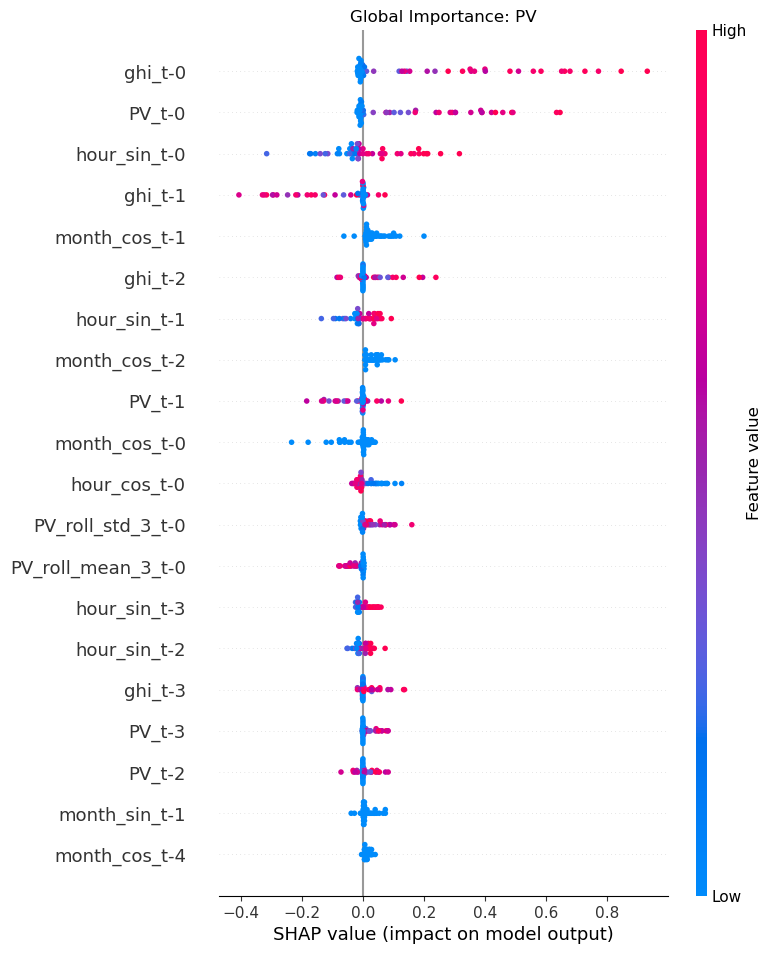

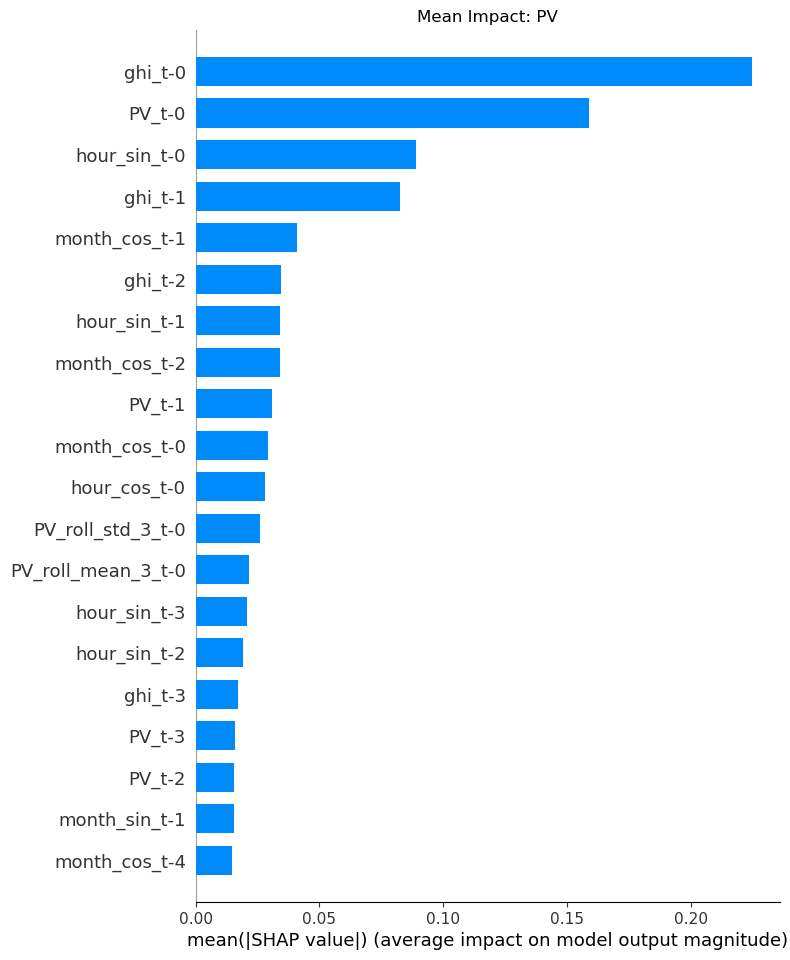

In [2]:

# Process data for target 0
current_shap_raw = np.array(all_shap_dict[0])
s_flat, d_flat, names = get_flattened_data(current_shap_raw)

print(f"Generating plots for: PV")

# 1. Summary Plot
plt.figure()
shap.summary_plot(s_flat, d_flat, feature_names=names, show=False)
plt.title(f"Global Importance: PV")
plt.show()

# 2. Bar Plot
plt.figure()
shap.summary_plot(s_flat, d_flat, feature_names=names, plot_type='bar', show=False)
plt.title(f"Mean Impact: PV")
plt.show()


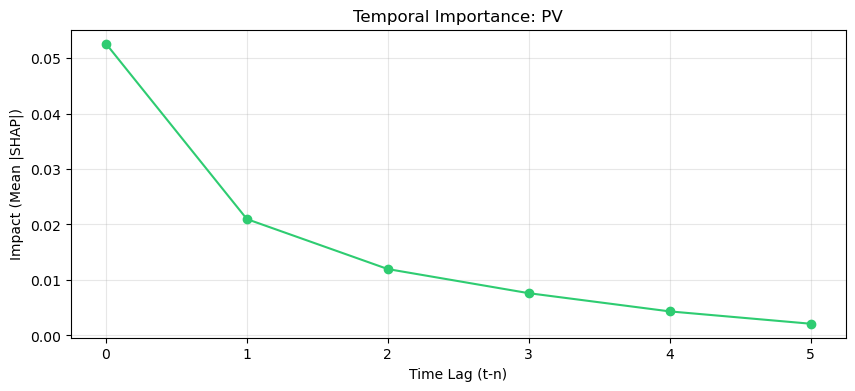

In [3]:

importance_over_time = np.abs(current_shap_raw).mean(axis=(0, 2))
plt.figure(figsize=(10, 4))
plt.plot(range(look_back-1, -1, -1), importance_over_time, marker='o', color='#2ecc71')
plt.title(f"Temporal Importance: PV")
plt.xlabel("Time Lag (t-n)")
plt.ylabel("Impact (Mean |SHAP|)")
plt.grid(True, alpha=0.3)
plt.show()
